In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from pandas.plotting import boxplot
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import Nystroem
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import altair as alt



print(__doc__)


Automatically created module for IPython interactive environment


In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/nyc-rolling-sales.csv'

In [3]:
raw_data = pd.read_csv(raw_data_url, encoding="utf-8", converters = {'LAND SQUARE FEET': str.strip, 'GROSS SQUARE FEET' : str.strip, 'SALE PRICE': str.strip  } )
raw_data.head(n=5)

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2     6625000  2017-07-19 00:00:00  
1                              C7           -  2016-12-14 00:00:00  
2                              C7           -  2016-12-09 00:00:00  
3                              C4     3936272  2016-09-23 00:00:00  
4                              C2     8000000  2016-11-17 00:00:00  

[5 rows x 22 columns]

In [4]:
raw_data.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
housing_data = raw_data.copy()


In [7]:
housing_data['DATEOFSALE'] = pd.to_datetime(housing_data['SALE DATE'])

In [8]:
housing_data = housing_data.drop(columns = ['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER', 'SALE DATE'], axis = 1)

In [9]:
housing_data.columns = housing_data.columns.str.replace(' ', '')

In [10]:
#We see there is a lot of white space with some of the columns, helper function to remove whitespace and return df 
def remove_white_space(cols_list, dataframe): 
    df = dataframe
    for col in cols_list:
        df[col] = df[col].str.strip()
    return df 
    

In [11]:
#Helper function to  look at unique levels in object categories 
def unique_categories(columns_list, dataframe_1): 
    miss_cat_vars = {}
    for var in columns_list: 
        print(var)
        k,v = var,dataframe_1[var].unique()
        miss_cat_vars.update({k : v})
    return miss_cat_vars

In [12]:
#Helper function for grouper imputation 

#Adapted from Jezreal's answer 
#https://stackoverflow.com/questions/51189962/how-to-replace-0-values-with-mean-based-on-groupby

def grouper_impute(dataframe_2, grouper_col = None, grouper_impute = None, replace_val = None, transfrmtn = None): 

    dataframe_2[grouper_impute] = dataframe_2[grouper_impute].replace(replace_val, np.nan)
    dataframe_2[grouper_impute] = dataframe_2[grouper_impute].fillna(dataframe_2.groupby(grouper_col)[grouper_impute].transform(transfrmtn))
    return dataframe_2
        

In [13]:
catagorical_vars = list(housing_data.select_dtypes(include='object').columns)
print(catagorical_vars)

['NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'TAXCLASSATPRESENT', 'BUILDINGCLASSATPRESENT', 'ADDRESS', 'LANDSQUAREFEET', 'GROSSSQUAREFEET', 'BUILDINGCLASSATTIMEOFSALE', 'SALEPRICE']


In [14]:
housing_data = remove_white_space(catagorical_vars, housing_data)

In [15]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    84548 non-null  int64         
 1   NEIGHBORHOOD               84548 non-null  object        
 2   BUILDINGCLASSCATEGORY      84548 non-null  object        
 3   TAXCLASSATPRESENT          84548 non-null  object        
 4   BLOCK                      84548 non-null  int64         
 5   LOT                        84548 non-null  int64         
 6   BUILDINGCLASSATPRESENT     84548 non-null  object        
 7   ADDRESS                    84548 non-null  object        
 8   ZIPCODE                    84548 non-null  int64         
 9   RESIDENTIALUNITS           84548 non-null  int64         
 10  COMMERCIALUNITS            84548 non-null  int64         
 11  TOTALUNITS                 84548 non-null  int64         
 12  LAND

As we are not sure what the '-' value for sale price means, we will omit it from further analysis, as these could be family property transfers or transfers other than sales. 

In [16]:
len(housing_data[housing_data['SALEPRICE'] == '-']) 

14561

As we are not sure what the '-' value for Landsqurefeet and grosssquarefeet means, we will omit it from further analysis. 

In [17]:
housing_data = housing_data[~((housing_data['LANDSQUAREFEET'] == '-') | (housing_data['GROSSSQUAREFEET'] == '-') | (housing_data['SALEPRICE'] == '-'))]

In [18]:
housing_data = housing_data[(housing_data['ZIPCODE'] != 0) & (housing_data['TOTALUNITS'] != 0) ] 

In [19]:
housing_data = housing_data.reset_index(drop=True)

In [20]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43049 entries, 0 to 43048
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    43049 non-null  int64         
 1   NEIGHBORHOOD               43049 non-null  object        
 2   BUILDINGCLASSCATEGORY      43049 non-null  object        
 3   TAXCLASSATPRESENT          43049 non-null  object        
 4   BLOCK                      43049 non-null  int64         
 5   LOT                        43049 non-null  int64         
 6   BUILDINGCLASSATPRESENT     43049 non-null  object        
 7   ADDRESS                    43049 non-null  object        
 8   ZIPCODE                    43049 non-null  int64         
 9   RESIDENTIALUNITS           43049 non-null  int64         
 10  COMMERCIALUNITS            43049 non-null  int64         
 11  TOTALUNITS                 43049 non-null  int64         
 12  LAND

In [21]:
housing_data_exclude = housing_data[((housing_data['LANDSQUAREFEET'] == '-') | (housing_data['GROSSSQUAREFEET'] == '-') | (housing_data['SALEPRICE'] == '-'))]
housing_data_exclude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    0 non-null      int64         
 1   NEIGHBORHOOD               0 non-null      object        
 2   BUILDINGCLASSCATEGORY      0 non-null      object        
 3   TAXCLASSATPRESENT          0 non-null      object        
 4   BLOCK                      0 non-null      int64         
 5   LOT                        0 non-null      int64         
 6   BUILDINGCLASSATPRESENT     0 non-null      object        
 7   ADDRESS                    0 non-null      object        
 8   ZIPCODE                    0 non-null      int64         
 9   RESIDENTIALUNITS           0 non-null      int64         
 10  COMMERCIALUNITS            0 non-null      int64         
 11  TOTALUNITS                 0 non-null      int64         
 12  LANDSQUAREFEET      

In [22]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43049 entries, 0 to 43048
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    43049 non-null  int64         
 1   NEIGHBORHOOD               43049 non-null  object        
 2   BUILDINGCLASSCATEGORY      43049 non-null  object        
 3   TAXCLASSATPRESENT          43049 non-null  object        
 4   BLOCK                      43049 non-null  int64         
 5   LOT                        43049 non-null  int64         
 6   BUILDINGCLASSATPRESENT     43049 non-null  object        
 7   ADDRESS                    43049 non-null  object        
 8   ZIPCODE                    43049 non-null  int64         
 9   RESIDENTIALUNITS           43049 non-null  int64         
 10  COMMERCIALUNITS            43049 non-null  int64         
 11  TOTALUNITS                 43049 non-null  int64         
 12  LAND

In [23]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
housing_data = housing_data.astype({'SALEPRICE': 'int64', 'LANDSQUAREFEET' : 'int64', 'GROSSSQUAREFEET' : 'int64', 'ZIPCODE' : 'object'})

In [24]:
string_of_day = housing_data.DATEOFSALE.astype(str).str.slice(start=-2).astype(int)

housing_data['TIMEOFMONTH'] = pd.cut(string_of_day, [1,14,15,31], labels=[1,2,3], include_lowest=True)

In [25]:
housing_data.TIMEOFMONTH = housing_data.TIMEOFMONTH.astype(object)

In [26]:
#https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html#A
BUILD_CLASS_DICT_ = {'A' : 'DWELLING', 'B' : 'DWELLING', 'C' : 'MULTI_DWELLING_NO_ELV', 'D' : 'MULTI_DWELLING_ELV', 'E' : 'WAREHOUSE', 'F' : 'FACTORY', 'G' : 'GARAGE_P_LOT', 'H' : 'HOTEL', 'I' : 'HOSIPTAL', 'J' : 'THEATRE', 'K' : 'REATAIL', 'L' : 'LOFT', 'M' : 'RELIGIOUS', 'N' : 'SOCIAL_INSTITUTION', 'O' : 'OFFICE', 'P' : 'COMMUNITY_CENTER', 'Q' : 'PUBLIC_REC', 'R' : 'COMMERCIAL' , 'S' : 'DWELLING_RETAIL', 'T' : 'PORT', 'U' : 'UTILITY', 'V' : 'ZONED', 'W' : 'SCHOOL', 'Y' : 'PUBLIC_SAFETY', 'Z' : 'OTHER'}

housing_data['BUILDCLASSGENER'] = housing_data.BUILDINGCLASSATPRESENT.astype(str).str.slice(start=0, stop=1).map(BUILD_CLASS_DICT_)



In [27]:
housing_data['SALEPRICECPY'] = housing_data['SALEPRICE']



housing_data = grouper_impute(dataframe_2 = housing_data, grouper_col = 'ZIPCODE', grouper_impute = 'SALEPRICE', replace_val = 0, transfrmtn = 'median')

housing_data = grouper_impute(dataframe_2 = housing_data, grouper_col = 'ZIPCODE', grouper_impute = 'YEARBUILT', replace_val = 0, transfrmtn = 'median')


housing_data = grouper_impute(dataframe_2 = housing_data, grouper_col = 'ZIPCODE', grouper_impute = 'LANDSQUAREFEET', replace_val = 0, transfrmtn = 'median')

housing_data = grouper_impute(dataframe_2 = housing_data, grouper_col = 'ZIPCODE', grouper_impute = 'GROSSSQUAREFEET', replace_val = 0, transfrmtn = 'median')

In [28]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.pad.html
housing_data['DECADEBUILT'] = housing_data.YEARBUILT.astype(str).str.slice(start=0,stop=3).str.pad(width = 4, side='right', fillchar = str(0))

In [29]:
housing_data['BUILDAGE'] = housing_data.DATEOFSALE.astype(str).str.slice(start=0,stop=4).astype(int) - housing_data.YEARBUILT

In [30]:
housing_data = housing_data.astype({'SALEPRICECPY': 'int64', 'LANDSQUAREFEET' : 'int64', 
                                    'GROSSSQUAREFEET' : 'int64', 'ZIPCODE' : 'object',
                                   'YEARBUILT' : 'int64', 'RESIDENTIALUNITS' : 'int64'
                                   ,'BUILDAGE' : 'int64'})

In [31]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43049 entries, 0 to 43048
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    43049 non-null  int64         
 1   NEIGHBORHOOD               43049 non-null  object        
 2   BUILDINGCLASSCATEGORY      43049 non-null  object        
 3   TAXCLASSATPRESENT          43049 non-null  object        
 4   BLOCK                      43049 non-null  int64         
 5   LOT                        43049 non-null  int64         
 6   BUILDINGCLASSATPRESENT     43049 non-null  object        
 7   ADDRESS                    43049 non-null  object        
 8   ZIPCODE                    43049 non-null  object        
 9   RESIDENTIALUNITS           43049 non-null  int64         
 10  COMMERCIALUNITS            43049 non-null  int64         
 11  TOTALUNITS                 43049 non-null  int64         
 12  LAND

## accounting for duplicate records

In [32]:
duplicate_records = housing_data[housing_data.duplicated(keep = False)]
duplicate_records

BOROUGH            NEIGHBORHOOD    BUILDINGCLASSCATEGORY  \
12           1                 CHELSEA  01 ONE FAMILY DWELLINGS   
13           1                 CHELSEA  01 ONE FAMILY DWELLINGS   
14           1                 CHELSEA  01 ONE FAMILY DWELLINGS   
172          1  GREENWICH VILLAGE-WEST  01 ONE FAMILY DWELLINGS   
173          1  GREENWICH VILLAGE-WEST  01 ONE FAMILY DWELLINGS   
...        ...                     ...                      ...   
42454        5       WEST NEW BRIGHTON  01 ONE FAMILY DWELLINGS   
42486        5       WEST NEW BRIGHTON  01 ONE FAMILY DWELLINGS   
42487        5       WEST NEW BRIGHTON  01 ONE FAMILY DWELLINGS   
42972        5                 WOODROW  01 ONE FAMILY DWELLINGS   
42973        5                 WOODROW  01 ONE FAMILY DWELLINGS   

      TAXCLASSATPRESENT  BLOCK  LOT BUILDINGCLASSATPRESENT  \
12                    1    772   29                     A4   
13                    1    772   29                     A4   
14                    1    772   29                     A4   
172                   1    585   69                     A5   
173                   1    585   69                     A5   
...                 ...    ...  ...                    ...   
42454                 1     91   31                     A1   
42486                 1    155  180                     A1   
42487                 1    155  180                     A1   
42972                 1   6969   20                     A5   
42973                 1   6969   20                     A5   

                      ADDRESS ZIPCODE  RESIDENTIALUNITS  ...  YEARBUILT  \
12     231 WEST 22ND   STREET   10011                 1  ...       1900   
13     231 WEST 22ND   STREET   10011                 1  ...       1900   
14     231 WEST 22ND   STREET   10011                 1  ...       1900   
172             2 GROVE COURT   10014                 1  ...       1901   
173             2 GROVE COURT   10014                 1  ...       1901   
...                       ...     ...               ...  ...        ...   
42454         3 CLINTON COURT   10301                 1  ...       2005   
42486      441 OAKLAND AVENUE   10310                 1  ...       1899   
42487      441 OAKLAND AVENUE   10310                 1  ...       1899   
42972     1045 SHELDON AVENUE   10309                 1  ...       1999   
42973     1045 SHELDON AVENUE   10309                 1  ...       1999   

       TAXCLASSATTIMEOFSALE  BUILDINGCLASSATTIMEOFSALE  SALEPRICE  DATEOFSALE  \
12                        1                         A4       10.0  2017-01-30   
13                        1                         A4       10.0  2017-01-30   
14                        1                         A4       10.0  2017-01-30   
172                       1                         A5  1375000.0  2016-10-07   
173                       1                         A5  1375000.0  2016-10-07   
...                     ...                        ...        ...         ...   
42454                     1                         A1   585000.0  2016-09-21   
42486                     1                         A1   725000.0  2017-06-30   
42487                     1                         A1   725000.0  2017-06-30   
42972                     1                         A5   560000.0  2016-09-07   
42973                     1                         A5   560000.0  2016-09-07   

       TIMEOFMONTH BUILDCLASSGENER  SALEPRICECPY DECADEBUILT BUILDAGE  
12               3        DWELLING            10        1900      117  
13               3        DWELLING            10        1900      117  
14               3        DWELLING            10        1900      117  
172              1        DWELLING       1375000        1900      115  
173              1        DWELLING       1375000        1900      115  
...            ...             ...           ...         ...      ...  
42454            3        DWELLING        585000        2000       11  
42486  

## Removing Duplicate Records

In [33]:
housing_data = housing_data[~housing_data.duplicated(keep = False)]

In [34]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42472 entries, 0 to 43048
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    42472 non-null  int64         
 1   NEIGHBORHOOD               42472 non-null  object        
 2   BUILDINGCLASSCATEGORY      42472 non-null  object        
 3   TAXCLASSATPRESENT          42472 non-null  object        
 4   BLOCK                      42472 non-null  int64         
 5   LOT                        42472 non-null  int64         
 6   BUILDINGCLASSATPRESENT     42472 non-null  object        
 7   ADDRESS                    42472 non-null  object        
 8   ZIPCODE                    42472 non-null  object        
 9   RESIDENTIALUNITS           42472 non-null  int64         
 10  COMMERCIALUNITS            42472 non-null  int64         
 11  TOTALUNITS                 42472 non-null  int64         
 12  LAND

In [35]:
housing_data.describe()

BOROUGH         BLOCK           LOT  RESIDENTIALUNITS  \
count  42472.000000  42472.000000  42472.000000      42472.000000   
mean       3.320705   5050.063147    240.219933          2.808227   
std        0.920834   3517.890524    501.983636         17.824145   
min        1.000000      1.000000      1.000000          0.000000   
25%        3.000000   2194.000000     22.000000          1.000000   
50%        3.000000   4631.000000     46.000000          1.000000   
75%        4.000000   7097.250000     96.000000          2.000000   
max        5.000000  16319.000000   8009.000000       1844.000000   

       COMMERCIALUNITS    TOTALUNITS  LANDSQUAREFEET  GROSSSQUAREFEET  \
count     42472.000000  42472.000000    4.247200e+04     4.247200e+04   
mean          0.254238      3.083726    3.698014e+03     4.303679e+03   
std          11.320171     21.241162    2.824663e+04     3.059721e+04   
min           0.000000      1.000000    2.000000e+02     1.200000e+02   
25%           0.000000      1.000000    2.000000e+03     1.511000e+03   
50%           0.000000      1.000000    2.475000e+03     2.140000e+03   
75%           0.000000      2.000000    3.276000e+03     3.024000e+03   
max        2261.000000   2261.000000    4.228300e+06     3.750565e+06   

          YEARBUILT  TAXCLASSATTIMEOFSALE     SALEPRICE  SALEPRICECPY  \
count  42472.000000          42472.000000  4.247200e+04  4.247200e+04   
mean    1945.020225              1.392447  1.406532e+06  1.231858e+06   
std       35.159630              0.803132  1.412658e+07  1.413691e+07   
min     1800.000000              1.000000  1.000000e+00  0.000000e+00   
25%     1920.000000              1.000000  4.550000e+05  1.200000e+05   
50%     1931.000000              1.000000  6.800000e+05  5.150000e+05   
75%     1965.000000              2.000000  9.900000e+05  8.650000e+05   
max     2017.000000              4.000000  2.210000e+09  2.210000e+09   

           BUILDAGE  
count  42472.000000  
mean      71.622151  
std       35.168604  
min        0.000000  
25%       52.000000  
50%       86.000000  
75%       97.000000  
max      217.000000

## Possible Imuptations

In [36]:
housing_data.groupby("BOROUGH").median()

BLOCK   LOT  RESIDENTIALUNITS  COMMERCIALUNITS  TOTALUNITS  \
BOROUGH                                                                
1        1422.0  34.0               4.0              0.0         6.0   
2        4099.0  45.0               2.0              0.0         2.0   
3        4297.0  54.0               2.0              0.0         2.0   
4        8842.0  36.0               1.0              0.0         1.0   
5        3230.5  49.0               1.0              0.0         1.0   

         LANDSQUAREFEET  GROSSSQUAREFEET  YEARBUILT  TAXCLASSATTIMEOFSALE  \
BOROUGH                                                                     
1                2469.0           7460.0     1910.0                   2.0   
2                2500.0           2200.0     1931.0                   1.0   
3                2100.0           2560.0     1930.0                   1.0   
4                2767.0           1616.0     1931.0                   1.0   
5                3400.0           1540.0     1974.0                   1.0   

         SALEPRICE  SALEPRICECPY  BUILDAGE  
BOROUGH                                     
1        6550000.0     6550000.0     106.0  
2         452475.0      349415.0      86.0  
3         900000.0      486500.0      87.0  
4         635000.0      635000.0      85.0  
5         485000.0      485000.0      43.0

In [37]:
housing_data.groupby("ZIPCODE").median()

BOROUGH    BLOCK   LOT  RESIDENTIALUNITS  COMMERCIALUNITS  \
ZIPCODE                                                              
10001        1.0    801.0  45.0               0.0              3.0   
10002        1.0    350.0  23.0               3.0              1.0   
10003        1.0    567.5  25.0               3.5              1.0   
10004        1.0     19.5  17.0               0.0              1.0   
10005        1.0     38.0  16.0               0.0              6.0   
...          ...      ...   ...               ...              ...   
11436        4.0  12027.5  45.5               1.0              0.0   
11691        4.0  15706.0  37.0               2.0              0.0   
11692        4.0  16046.0  41.0               2.0              0.0   
11693        4.0  15801.5  29.0               1.0              0.0   
11694        4.0  16256.0  29.0               1.0              0.0   

         TOTALUNITS  LANDSQUAREFEET  GROSSSQUAREFEET  YEARBUILT  \
ZIPCODE                                                           
10001           6.0          4938.0          45449.0     1920.0   
10002           7.0          2214.0          10230.0     1901.0   
10003           5.5          2300.0           6966.0     1901.0   
10004           1.0         24798.0         568649.5     1995.0   
10005          23.0         17623.0         400531.0     1929.0   
...             ...             ...              ...        ...   
11436           1.0          2366.5           1215.0     1925.0   
11691           2.0          3148.5           2066.0     1950.0   
11692           2.0          3000.0           2040.0     1984.5   
11693           1.0          2500.0           1377.0     1925.0   
11694           1.0          4000.0           2057.0     1930.0   

         TAXCLASSATTIMEOFSALE    SALEPRICE  SALEPRICECPY  BUILDAGE  
ZIPCODE                                                             
10001                     4.0   16540319.0    16540319.0      97.0  
10002                     4.0    9200000.0     9200000.0     116.0  
10003                     2.0    7525000.0     7525000.0     115.0  
10004                     4.0  376053600.0   376053600.0      21.5  
10005                     4.0  182391612.0   182391612.0      87.0  
...                       ...          ...           ...       ...  
11436                     1.0     382500.0      382500.0      91.0  
11691                     1.0     414350.0      414350.0      67.0  
11692                     1.0     401000.0      401000.0      32.5  
11693                     1.0     358210.0      358210.0      92.0  
11694                     1.0     789350.0      789350.0      86.0  

[179 rows x 13 columns]

In [38]:
housing_data.groupby("BOROUGH",as_index=False).agg({'ZIPCODE': lambda x: x.mode()})

BOROUGH  ZIPCODE
0        1    10029
1        2    10469
2        3    11234
3        4    11434
4        5    10314

In [39]:
housing_data.groupby("BOROUGH",as_index=False).agg({'RESIDENTIALUNITS': lambda x: x.mode()})

BOROUGH  RESIDENTIALUNITS
0        1                 0
1        2                 1
2        3                 1
3        4                 1
4        5                 1

In [40]:
housing_data.groupby('DATEOFSALE').count()

BOROUGH  NEIGHBORHOOD  BUILDINGCLASSCATEGORY  TAXCLASSATPRESENT  \
DATEOFSALE                                                                    
2016-09-01      176           176                    176                176   
2016-09-02      102           102                    102                102   
2016-09-03        4             4                      4                  4   
2016-09-05        2             2                      2                  2   
2016-09-06      125           125                    125                125   
...             ...           ...                    ...                ...   
2017-08-27        1             1                      1                  1   
2017-08-28       67            67                     67                 67   
2017-08-29       67            67                     67                 67   
2017-08-30       60            60                     60                 60   
2017-08-31       39            39                     39                 39   

            BLOCK  LOT  BUILDINGCLASSATPRESENT  ADDRESS  ZIPCODE  \
DATEOFSALE                                                         
2016-09-01    176  176                     176      176      176   
2016-09-02    102  102                     102      102      102   
2016-09-03      4    4                       4        4        4   
2016-09-05      2    2                       2        2        2   
2016-09-06    125  125                     125      125      125   
...           ...  ...                     ...      ...      ...   
2017-08-27      1    1                       1        1        1   
2017-08-28     67   67                      67       67       67   
2017-08-29     67   67                      67       67       67   
2017-08-30     60   60                      60       60       60   
2017-08-31     39   39                      39       39       39   

            RESIDENTIALUNITS  ...  GROSSSQUAREFEET  YEARBUILT  \
DATEOFSALE                    ...                               
2016-09-01               176  ...              176        176   
2016-09-02               102  ...              102        102   
2016-09-03                 4  ...                4          4   
2016-09-05                 2  ...                2          2   
2016-09-06               125  ...              125        125   
...                      ...  ...              ...        ...   
2017-08-27                 1  ...                1          1   
2017-08-28                67  ...               67         67   
2017-08-29                67  ...               67         67   
2017-08-30                60  ...               60         60   
2017-08-31                39  ...               39         39   

            TAXCLASSATTIMEOFSALE  BUILDINGCLASSATTIMEOFSALE  SALEPRICE  \
DATEOFSALE                                                               
2016-09-01                   176                        176        176   
2016-09-02                   102                        102        102   
2016-09-03                     4                          4          4   
2016-09-05                     2                          2          2   
2016-09-06                   125                        125        125   
...                          ...                        ...        ...   
2017-08-27                     1                          1          1   
2017-08-28                    67                         67         67   
2017-08-29                    67                         67         67   
2017-08-30                    60                         60         60   
2017-08-31                    39                         39         39   

            TIMEOFMONTH  BUILDCLASSGENER  SALEPRICECPY  DECADEBUILT  BUILDAGE  
DATEOFSALE                                                                     
2016-09-01          176              176           176          176       176  
2016-09-02          102              102          

In [41]:
cat_feat = list(housing_data.select_dtypes(include='object').columns)
cat_feat

['NEIGHBORHOOD',
 'BUILDINGCLASSCATEGORY',
 'TAXCLASSATPRESENT',
 'BUILDINGCLASSATPRESENT',
 'ADDRESS',
 'ZIPCODE',
 'BUILDINGCLASSATTIMEOFSALE',
 'TIMEOFMONTH',
 'BUILDCLASSGENER',
 'DECADEBUILT']

In [42]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42472 entries, 0 to 43048
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    42472 non-null  int64         
 1   NEIGHBORHOOD               42472 non-null  object        
 2   BUILDINGCLASSCATEGORY      42472 non-null  object        
 3   TAXCLASSATPRESENT          42472 non-null  object        
 4   BLOCK                      42472 non-null  int64         
 5   LOT                        42472 non-null  int64         
 6   BUILDINGCLASSATPRESENT     42472 non-null  object        
 7   ADDRESS                    42472 non-null  object        
 8   ZIPCODE                    42472 non-null  object        
 9   RESIDENTIALUNITS           42472 non-null  int64         
 10  COMMERCIALUNITS            42472 non-null  int64         
 11  TOTALUNITS                 42472 non-null  int64         
 12  LAND

In [43]:
housing_data.head(n=20)

BOROUGH   NEIGHBORHOOD             BUILDINGCLASSCATEGORY  \
0         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
1         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
2         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
3         1  ALPHABET CITY    07 RENTALS - WALKUP APARTMENTS   
4         1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS   
5         1  ALPHABET CITY  08 RENTALS - ELEVATOR APARTMENTS   
6         1  ALPHABET CITY      09 COOPS - WALKUP APARTMENTS   
7         1  ALPHABET CITY            14 RENTALS - 4-10 UNIT   
8         1  ALPHABET CITY            14 RENTALS - 4-10 UNIT   
9         1  ALPHABET CITY            14 RENTALS - 4-10 UNIT   
10        1  ALPHABET CITY                22 STORE BUILDINGS   
11        1        CHELSEA           01 ONE FAMILY DWELLINGS   
15        1        CHELSEA           02 TWO FAMILY DWELLINGS   
16        1        CHELSEA         03 THREE FAMILY DWELLINGS   
17        1        CHELSEA    07 RENTALS - WALKUP APARTMENTS   
18        1        CHELSEA    07 RENTALS - WALKUP APARTMENTS   
19        1        CHELSEA    07 RENTALS - WALKUP APARTMENTS   
20        1        CHELSEA    07 RENTALS - WALKUP APARTMENTS   
21        1        CHELSEA    07 RENTALS - WALKUP APARTMENTS   
22        1        CHELSEA    07 RENTALS - WALKUP APARTMENTS   

   TAXCLASSATPRESENT  BLOCK  LOT BUILDINGCLASSATPRESENT  \
0                 2A    392    6                     C2   
1                 2B    402   21                     C4   
2                 2A    404   55                     C2   
3                 2B    406   32                     C4   
4                  2    387  153                     D9   
5                 2B    400   21                     D1   
6                  2    376   14                     C6   
7                 2A    391   19                     S3   
8                 2A    393    4                     S4   
9                 2A    394    5                     S5   
10                 4    390   34                     K4   
11                 1    771   52                     A9   
15                 1    769   49                     S2   
16                 1    719   67                     C0   
17                2B    696   37                     C4   
18                2A    722    6                     C3   
19                 2    743   56                     C5   
20                2A    745   63                     C3   
21                 2    764   68                     C4   
22                2B    765   25                     C4   

                    ADDRESS ZIPCODE  RESIDENTIALUNITS  ...  YEARBUILT  \
0              153 AVENUE B   10009                 5  ...       1900   
1       154 EAST 7TH STREET   10009                10  ...       1913   
2    301 EAST 10TH   STREET   10009                 6  ...       1900   
3              210 AVENUE B   10009                 8  ...       1920   
4       629 EAST 5TH STREET   10009                24  ...       1920   
5   530-532 EAST 5TH STREET   10009                10  ...       2009   
6       244 EAST 7TH STREET   10009                24  ...       1928   
7     624 EAST 9TH   STREET   10009                 3  ...       1910   
8              165 AVENUE B   10009                 4  ...       1900   
9              183 AVENUE B   10009                 5  ...       1910   
10             115 AVENUE C   10009                 0  ...       1899   
11   224 WEST 22ND   STREET   10011                 1  ...       1901   
15   218 WEST 20TH   STREET   10011                 2  ...       1920   
16     444 WEST 22ND STREET   10011                 3  ...       1901   
17        253 10TH   AVENUE   10001                 6  ...       1901   
18   459 WEST 24TH   STREET   10011                 4  ...       1910   
19     318 WEST 20TH STREET   10011                24  ...       1900   
20     348 WEST 22ND STREET   10011                 4  ...       1900   
21     256 WEST 15TH STREET   10

In [44]:
unique_categories(columns_list = cat_feat, dataframe_1 = housing_data)

NEIGHBORHOOD
BUILDINGCLASSCATEGORY
TAXCLASSATPRESENT
BUILDINGCLASSATPRESENT
ADDRESS
ZIPCODE
BUILDINGCLASSATTIMEOFSALE
TIMEOFMONTH
BUILDCLASSGENER
DECADEBUILT


{'NEIGHBORHOOD': array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
        'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
        'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
        'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
        'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
        'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
        'MIDTOWN EAST', 'MIDTOWN WEST', 'MURRAY HILL', 'ROOSEVELT ISLAND',
        'SOHO', 'SOUTHBRIDGE', 'TRIBECA', 'UPPER EAST SIDE (59-79)',
        'UPPER EAST SIDE (79-96)', 'UPPER EAST SIDE (96-110)',
        'UPPER WEST SIDE (59-79)', 'UPPER WEST SIDE (79-96)',
        'UPPER WEST SIDE (96-116)', 'WASHINGTON HEIGHTS LOWER',
        'WASHINGTON HEIGHTS UPPER', 'BATHGATE', 'BAYCHESTER',
        'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK', 'BRONXDALE',
        'CASTLE HILL/UNIONPORT', 'CITY ISLAND', 'CITY ISLAND-PELHAM STRIP',
        'CO-OP CITY', 'COUNTRY CLUB

In [45]:
sum(housing_data['RESIDENTIALUNITS'] == 0)

2698

In [46]:
sum(housing_data['TOTALUNITS'] == 0)

0

In [47]:
len(housing_data.BUILDINGCLASSCATEGORY.unique())

43

In [48]:
#instances where building class at present changed from time of sale -- reclassification
housing_data[housing_data.BUILDINGCLASSATPRESENT != housing_data.BUILDINGCLASSATTIMEOFSALE ]

BOROUGH    NEIGHBORHOOD           BUILDINGCLASSCATEGORY  \
281          1  HARLEM-CENTRAL  07 RENTALS - WALKUP APARTMENTS   
495          1    HARLEM-UPPER         37 RELIGIOUS FACILITIES   
707          1    MIDTOWN WEST       31 COMMERCIAL VACANT LAND   
756          1            SOHO          41 TAX CLASS 4 - OTHER   
1477         2      BAYCHESTER                44 CONDO PARKING   
...        ...             ...                             ...   
42764        5     WESTERLEIGH         01 ONE FAMILY DWELLINGS   
42776        5     WESTERLEIGH         01 ONE FAMILY DWELLINGS   
42779        5     WESTERLEIGH         01 ONE FAMILY DWELLINGS   
42781        5     WESTERLEIGH         01 ONE FAMILY DWELLINGS   
42849        5     WILLOWBROOK         01 ONE FAMILY DWELLINGS   

      TAXCLASSATPRESENT  BLOCK   LOT BUILDINGCLASSATPRESENT  \
281                   1   1911   148                     B1   
495                   1   2074   119                     B1   
707                   2   1270    45                     C7   
756                   4    513    28                     K2   
1477                  4   4939  1010                     RG   
...                 ...    ...   ...                    ...   
42764                 1   1475    13                     A0   
42776                 1   1508    52                     A0   
42779                 1   1508   203                     A5   
42781                 1   1525    64                     A1   
42849                 1    735   164                     B3   

                     ADDRESS ZIPCODE  RESIDENTIALUNITS  ...  YEARBUILT  \
281             130 W 127 ST   10027                 2  ...       1910   
495    513 WEST 142ND STREET   10031                 2  ...       1926   
707    12 WEST 55TH   STREET   10019                 8  ...       1920   
756        155 MERCER STREET   10012                 0  ...       1920   
1477       3701 PRATT AVENUE   10466                 0  ...       2013   
...                      ...     ...               ...  ...        ...   
42764   281 WILLOWBROOK ROAD   10302                 1  ...       1955   
42776   26 CANTERBURY AVENUE   10314                 1  ...       1945   
42779    40 CAMBRIDGE AVENUE   10314                 1  ...       1970   
42781   250 CAMBRIDGE AVENUE   10314                 1  ...       1965   
42849       22 CARMEL AVENUE   10314                 2  ...       1950   

       TAXCLASSATTIMEOFSALE  BUILDINGCLASSATTIMEOFSALE   SALEPRICE  \
281                       2                         C3   2525000.0   
495                       4                         M1   2890000.0   
707                       4                         V1  83000000.0   
756                       4                         Z9  93000000.0   
1477                      4                         RP    405000.0   
...                     ...                        ...         ...   
42764                     1                         A2    545000.0   
42776                     1                         A2    514999.0   
42779                     1                         A9    419000.0   
42781                     1                         A3    710000.0   
42849                     1                         A1    712673.0   

       DATEOFSALE  TIMEOFMONTH        BUILDCLASSGENER  SALEPRICECPY  \
281    2016-10-25            3               DWELLING       2525000   
495    2017-01-13            1               DWELLING       2890000   
707    2017-08-22            3  MULTI_DWELLING_NO_ELV      83000000   
756    2016-11-04            1                REATAIL      93000000   
1477   2016-09-27            3             COMMERCIAL             0   
...           ...          ...                    ...           ...   
42764  2016-09-01            1               DWELLING        545000   
42776  2016-09-19            3               DWELLING        514999   
42779  2016-10-27            3               DWELLING        419000   
42781  2016-10-14

### ANALYSIS HELPER FUNCTIONS

In [49]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-ridge-regression-py
#https://scikit-learn.org/stable/modules/model_evaluation.html

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring=None):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()

    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [50]:
# Adapted from:
# https://www.featureranking.com/tutorials/machine-learning-tutorials/information-gain-computation/
#https://nbviewer.jupyter.org/github/jakemdrew/MachineLearningExtras/blob/master/LFW%20Dataset%20and%20Class%20Imbalance.ipynb

def gini_index(y):
    probs = pd.value_counts(y,normalize=True)
    return 1 - np.sum(np.square(probs))

def plot_class_dist(y, target_label = None):
    fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
    class_ct = len(np.unique(y))
    vc = pd.value_counts(y)
    print('Total Records', len(y))
    print('Total Classes:', class_ct)
    print('Class Gini Index', gini_index(y))
    print('Smallest Class Id:',vc.idxmin(),'Records:',vc.min())
    print('Largest Class Id:',vc.idxmax(),'Records:',vc.max())
    print('Accuracy when Guessing:', np.round( (1 / len(np.unique(y))) * 100, 2), '%')

    sns.distplot(y, ax=axarr[0], bins=class_ct).set_title('Target Class Distribution:', target_label);
    sns.distplot(y, ax=axarr[1], kde=False, bins=class_ct).set_title('Target Class Counts:', target_label);
    
    
# This function creates dummy encodings from a lsit of features of interest and returns a dataframe     
def create_dummy_encod(ml_df,features_of_interest, drop_first_cat=True, sparsity=True): 
    tmp_cont = []
    ml_data_copy = ml_df.copy()
    for feat in features_of_interest: 
        tmp_df = pd.get_dummies(ml_data_copy[feat],prefix=str(feat),sparse=sparsity,drop_first=drop_first_cat)
        tmp_cont.append(tmp_df)
        feat_df = pd.concat(tmp_cont,axis=1)
        ml_df = pd.concat([ml_data_copy,feat_df], axis=1)
        ml_df = ml_df.drop(columns = features_of_interest, axis = 1)
    return ml_df 



#Adopted from 
#https://nbviewer.jupyter.org/github/jakemdrew/MachineLearningExtras/blob/master/LFW%20Dataset%20and%20Class%20Imbalance.ipynb

# This function provides a way to use stratiefied cv with the test models function below using the default score of accuarcy 

cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=959)

def stratified_cross_validate(model, X, y, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean Accuracy: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return


#This function provides a quick method to to performe strativied cross validation model comparision 

def test_models(X, y, models, model_names):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,X,y)
        print(' ')

#This function will plot PCs based on the length of features in the dataframe or change to how many features you wish to input 
def plot_pca(X,var_ratio_pcs = 60):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance explained with :', var_ratio_pcs , 'components:',sum(pca.explained_variance_ratio_[0:var_ratio_pcs]) )

    



Let's see how many classes we have and their frequencies 

In [51]:
y_num_class = housing_data.BOROUGH.values

We see we have a highly imbalanced data set for Borough values for the outcomes and there is a 20% chance of guessing the class correctly. 

Total Records 42472
Total Classes: 5
Class Gini Index 0.6801239561513959
Smallest Class Id: 1 Records: 952
Largest Class Id: 3 Records: 19983
Accuracy when Guessing: 20.0 %


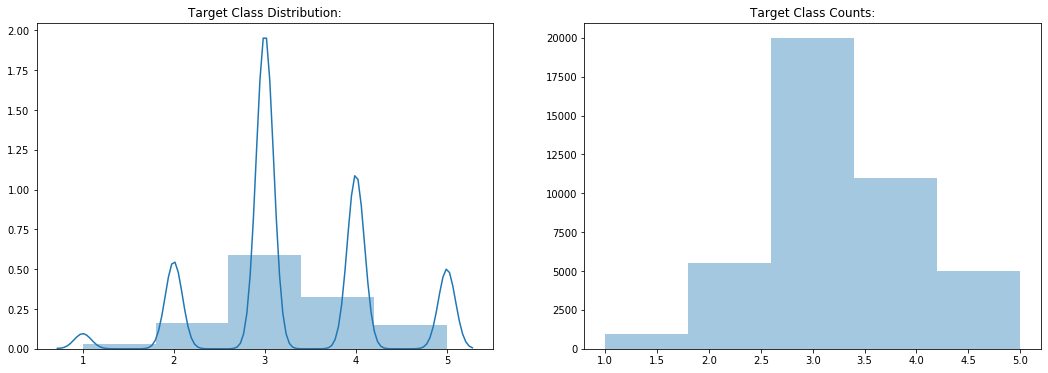

In [52]:
plot_class_dist(y_num_class) 

In [53]:
feat_of_int = [ 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'ZIPCODE', 'DECADEBUILT','TAXCLASSATPRESENT', 'BUILDINGCLASSATPRESENT', 'TIMEOFMONTH','BUILDCLASSGENER']
housing_ml_df = housing_data[['NEIGHBORHOOD','BUILDINGCLASSCATEGORY','ZIPCODE', 'DECADEBUILT', 'TAXCLASSATPRESENT', 
                              'BUILDINGCLASSATPRESENT', 'TIMEOFMONTH','BUILDCLASSGENER', 
                              'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
                              'LANDSQUAREFEET', 'GROSSSQUAREFEET','YEARBUILT',
                              'SALEPRICE','BOROUGH']]
ml_df_enc = create_dummy_encod(ml_df = housing_ml_df,features_of_interest = feat_of_int, drop_first_cat=True, sparsity=True)

In [54]:
ml_df_enc.head(n=5)

RESIDENTIALUNITS  COMMERCIALUNITS  TOTALUNITS  LANDSQUAREFEET  \
0                 5                0           5            1633   
1                10                0          10            2272   
2                 6                0           6            2369   
3                 8                0           8            1750   
4                24                0          24            4489   

   GROSSSQUAREFEET  YEARBUILT   SALEPRICE  BOROUGH  \
0             6440       1900   6625000.0        1   
1             6794       1913   3936272.0        1   
2             4615       1900   8000000.0        1   
3             4226       1920   3192840.0        1   
4            18523       1920  16232000.0        1   

   NEIGHBORHOOD_ALPHABET CITY  NEIGHBORHOOD_ANNADALE  ...  \
0                           1                      0  ...   
1                           1                      0  ...   
2                           1                      0  ...   
3                           1                      0  ...   
4                           1                      0  ...   

   BUILDCLASSGENER_OTHER  BUILDCLASSGENER_PUBLIC_REC  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   BUILDCLASSGENER_PUBLIC_SAFETY  BUILDCLASSGENER_REATAIL  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   BUILDCLASSGENER_RELIGIOUS  BUILDCLASSGENER_SCHOOL  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   BUILDCLASSGENER_SOCIAL_INSTITUTION  BUILDCLASSGENER_THEATRE  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   

   BUILDCLASSGENER_WAREHOUSE  BUILDCLASSGENER_ZONED  
0                          0                      0  
1                          0                      0  
2                          0                      0  
3                          0                      0  
4                          0                      0  

[5 rows x 673 columns]

In [55]:
#Create scaler object 
ML_std_scalr = StandardScaler()


In [56]:
y = ml_df_enc['BOROUGH'].values
X = ml_df_enc.drop(columns = ['BOROUGH'], axis = 1).values

In [57]:

mods = [
    #XGBClassifier(),
    GaussianNB(), 
    MultinomialNB(),
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3,max_iter=5, 
                  tol=None, n_jobs=-1, random_state=959),
    RandomForestClassifier(n_estimators=200, max_depth=3, 
                           n_jobs=-1, random_state=959),
    LinearSVC(random_state=959),
    LogisticRegression(n_jobs=-1, random_state=959)
]

mod_names = ['GaussianNB','MultinomialNB','SGDClassifier',
               'RandomForestClassifier','LinearSVC','LogisticRegression']

test_models(X,y, models = mods, model_names = mod_names)

GaussianNB
--------------------------------
Fold Scores:
 
[0.47339925 0.47434087 0.47044973 0.47398163 0.47586532 0.47303979
 0.47209795 0.47139157 0.47209795 0.47515894]
 
Mean Accuracy:  0.4731822995028727
Mean Fit Time:  1.2179212808609008
Mean Score Time:  0.1381627321243286
CV Time:  12.317279815673828
 
MultinomialNB
--------------------------------
Fold Scores:
 
[0.4809322  0.4809322  0.48834471 0.48551919 0.47421709 0.48528373
 0.49164116 0.4765717  0.46950789 0.48057452]
 
Mean Accuracy:  0.48135244020704543
Mean Fit Time:  0.9021690607070922
Mean Score Time:  0.07391555309295654
CV Time:  10.612154722213745
 
SGDClassifier
--------------------------------
Fold Scores:
 
[0.05743879 0.12829567 0.12432305 0.13209324 0.51047798 0.25735814
 0.25924182 0.46903697 0.13468331 0.15304921]
 
Mean Accuracy:  0.22259981788407637
Mean Fit Time:  1.6414477825164795
Mean Score Time:  0.11871514320373536
CV Time:  14.181314468383789
 
RandomForestClassifier
-------------------------------

A perfect confusion matrix will only show shaded squares across the matrix diagonal.

However, the confusion matrix below shows that many class predictions are getting confused with the larger classes 2,3,4.

This is evident by the high number of off-diagonal shaded boxes for each column.

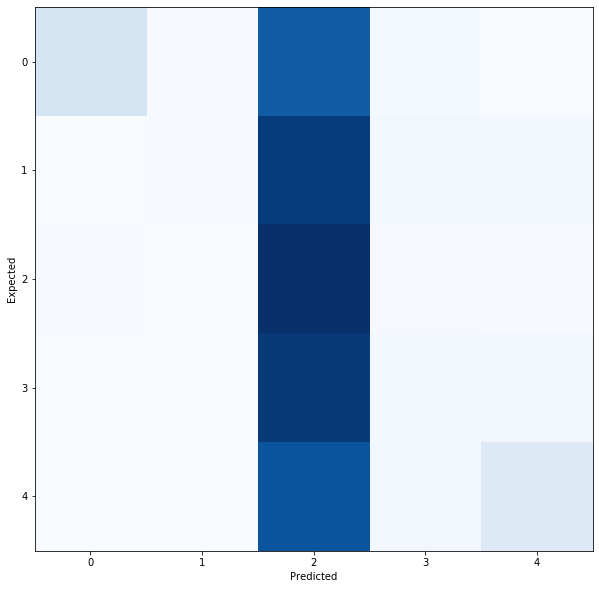

In [58]:
#adapted from 
#https://nbviewer.jupyter.org/github/jakemdrew/MachineLearningExtras/blob/master/LFW%20Dataset%20and%20Class%20Imbalance.ipynb

# Break our data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=959, stratify=y)

# Use logstic regression to build a model and predict on the test set
lr_clf = LogisticRegression(solver='liblinear', random_state=959)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

# Create a confusion matrix to see what classes the logistic regression is getting wrong 



plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.grid(False)

Cumulative Explained variance explained with : 400 components: 0.9028844247425256


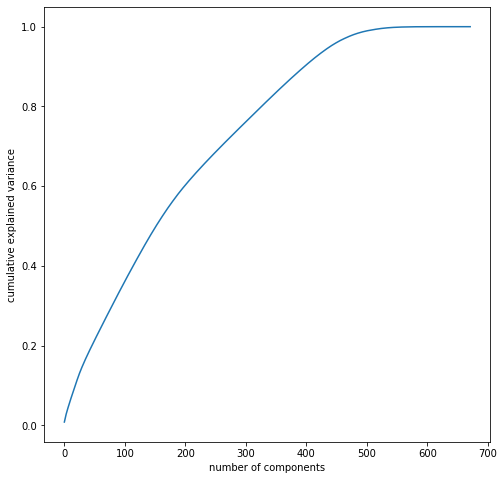

In [59]:
#Scaling the features makes a big improvement to accuaracy 
X = ML_std_scalr.fit_transform(X)

plot_pca(X,var_ratio_pcs = 400)


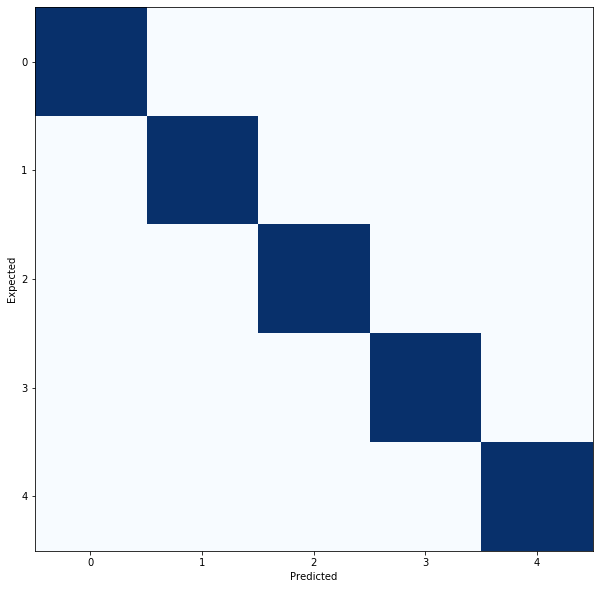

In [60]:
#adapted from 
#https://nbviewer.jupyter.org/github/jakemdrew/MachineLearningExtras/blob/master/LFW%20Dataset%20and%20Class%20Imbalance.ipynb

# Break our data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=959, stratify=y)

# Use logstic regression to build a model and predict on the test set
lr_clf = LogisticRegression(solver='liblinear', random_state=959)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

# Create a confusion matrix to see what classes the logistic regression is getting wrong 



plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Blues'),aspect='auto')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.grid(False)

SMOTE SAMPLING

Total Records 99915
Total Classes: 5
Class Gini Index 0.7999999999999999
Smallest Class Id: 5 Records: 19983
Largest Class Id: 5 Records: 19983
Accuracy when Guessing: 20.0 %


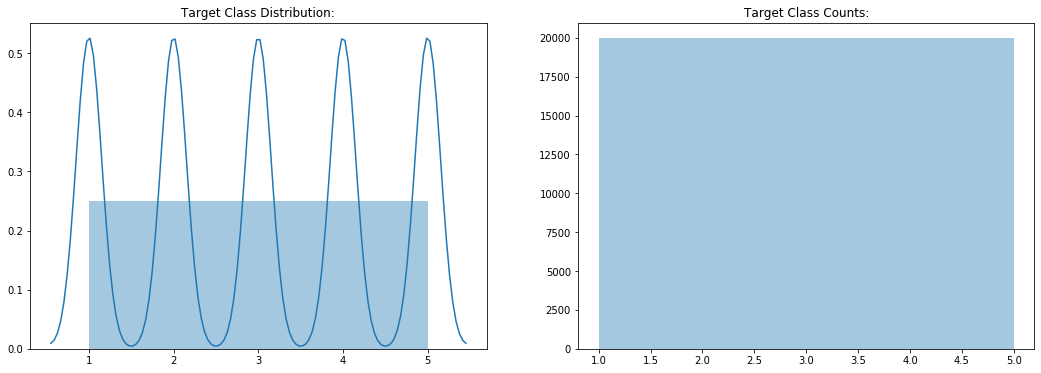

In [61]:
#https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#smote-variants

smte = SMOTE(sampling_strategy='not majority')
X_smote, y_smote = smte.fit_sample(X, y)

plot_class_dist(y_smote)

TESTING STRATIFIED SAMPLING WITH SMOTE 

In [62]:
sskf = StratifiedKFold(n_splits=10,shuffle=True, random_state=959)
sskf.get_n_splits(X_smote, y_smote)

test_idx = {}
train_idx = {}
counter = 1
for train_index, test_index in sskf.split(X_smote, y_smote):
    
    k,v = counter, train_index
    train_idx.update({k : v})
    
    k,v = counter, test_index
    test_idx.update({k : v})
    
    counter+=1
    
    


In [63]:
#Adapted from 
#https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths
test_folds = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in test_idx.items() ]))
test_folds 

1      2      3      4      5        6        7        8        9   \
0        14      0      2      9      6     17.0     10.0      5.0     12.0   
1        23      1      8     20      7     60.0     11.0     13.0     22.0   
2        31     21     19     28     15     80.0     37.0     16.0     27.0   
3        44     32     34     40     33     86.0     45.0     24.0     38.0   
4        54     47     35     67     48     87.0     49.0     25.0     59.0   
...     ...    ...    ...    ...    ...      ...      ...      ...      ...   
9987  99849  99853  99833  99830  99880  99872.0  99899.0  99870.0  99889.0   
9988  99854  99858  99868  99843  99893  99874.0  99903.0  99879.0  99892.0   
9989  99855  99885  99898  99846  99896  99905.0  99904.0  99882.0  99894.0   
9990  99860  99902  99908  99890  99897  99912.0  99907.0  99906.0  99900.0   
9991  99878  99909  99914  99913  99910      NaN      NaN      NaN      NaN   

           10  
0         3.0  
1         4.0  
2        18.0  
3        26.0  
4        52.0  
...       ...  
9987  99886.0  
9988  99887.0  
9989  99901.0  
9990  99911.0  
9991      NaN  

[9992 rows x 10 columns]

In [64]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt
test_folds_melt = test_folds.copy()
test_folds_melt['idx'] = test_folds_melt.index
test_folds_melt = test_folds_melt.melt(id_vars=['idx'], value_vars=[1,2,3,4,5,6,7,8,9,10], var_name ='Fold')
test_folds_melt.rename(columns = {'Idx' : 'OrigIdx', 'value' : 'SMOTEIdx'}, inplace = True) 
test_folds_melt

idx Fold  SMOTEIdx
0         0    1      14.0
1         1    1      23.0
2         2    1      31.0
3         3    1      44.0
4         4    1      54.0
...     ...  ...       ...
99915  9987   10   99886.0
99916  9988   10   99887.0
99917  9989   10   99901.0
99918  9990   10   99911.0
99919  9991   10       NaN

[99920 rows x 3 columns]

In [65]:
test_folds_melt = test_folds_melt.dropna(axis = 0)
test_folds_melt

idx Fold  SMOTEIdx
0         0    1      14.0
1         1    1      23.0
2         2    1      31.0
3         3    1      44.0
4         4    1      54.0
...     ...  ...       ...
99914  9986   10   99873.0
99915  9987   10   99886.0
99916  9988   10   99887.0
99917  9989   10   99901.0
99918  9990   10   99911.0

[99915 rows x 3 columns]

In [66]:
test_folds_melt['SMOTEID'] = test_folds_melt.SMOTEIdx.astype('int32')
test_folds_melt = test_folds_melt.drop(columns = 'SMOTEIdx')

/home/andrew/anaconda3/envs/r_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
test_folds_melt

idx Fold  SMOTEID
0         0    1       14
1         1    1       23
2         2    1       31
3         3    1       44
4         4    1       54
...     ...  ...      ...
99914  9986   10    99873
99915  9987   10    99886
99916  9988   10    99887
99917  9989   10    99901
99918  9990   10    99911

[99915 rows x 3 columns]

In [68]:
test_folds_melt[test_folds_melt.duplicated(['SMOTEID'], keep=False)]

Empty DataFrame
Columns: [idx, Fold, SMOTEID]
Index: []

In [69]:
train_folds = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in train_idx.items() ]))
train_folds 

1        2        3        4        5      6      7      8   \
0          0.0      2.0      0.0      0.0      0.0      0      0      0   
1          1.0      3.0      1.0      1.0      1.0      1      1      1   
2          2.0      4.0      3.0      2.0      2.0      2      2      2   
3          3.0      5.0      4.0      3.0      3.0      3      3      3   
4          4.0      6.0      5.0      4.0      4.0      4      4      4   
...        ...      ...      ...      ...      ...    ...    ...    ...   
89919  99911.0  99911.0  99910.0  99910.0  99911.0  99909  99910  99910   
89920  99912.0  99912.0  99911.0  99911.0  99912.0  99910  99911  99911   
89921  99913.0  99913.0  99912.0  99912.0  99913.0  99911  99912  99912   
89922  99914.0  99914.0  99913.0  99914.0  99914.0  99913  99913  99913   
89923      NaN      NaN      NaN      NaN      NaN  99914  99914  99914   

          9      10  
0          0      0  
1          1      1  
2          2      2  
3          3      5  
4          4      6  
...      ...    ...  
89919  99910  99909  
89920  99911  99910  
89921  99912  99912  
89922  99913  99913  
89923  99914  99914  

[89924 rows x 10 columns]

In [70]:
train_folds_melt = train_folds.copy()
train_folds_melt['idx'] = train_folds_melt.index
train_folds_melt = train_folds_melt.melt(id_vars=['idx'], value_vars=[1,2,3,4,5,6,7,8,9,10], var_name = 'Fold')
train_folds_melt.rename(columns = {'Idx' : 'OrigIdx', 'value' : 'SMOTEIdx'}, inplace = True) 
train_folds_melt

idx Fold  SMOTEIdx
0           0    1       0.0
1           1    1       1.0
2           2    1       2.0
3           3    1       3.0
4           4    1       4.0
...       ...  ...       ...
899235  89919   10   99909.0
899236  89920   10   99910.0
899237  89921   10   99912.0
899238  89922   10   99913.0
899239  89923   10   99914.0

[899240 rows x 3 columns]

In [71]:
train_folds_melt = train_folds_melt.dropna(axis = 0)
train_folds_melt

idx Fold  SMOTEIdx
0           0    1       0.0
1           1    1       1.0
2           2    1       2.0
3           3    1       3.0
4           4    1       4.0
...       ...  ...       ...
899235  89919   10   99909.0
899236  89920   10   99910.0
899237  89921   10   99912.0
899238  89922   10   99913.0
899239  89923   10   99914.0

[899235 rows x 3 columns]

In [72]:
train_folds_melt = train_folds_melt.dropna(axis = 0)
train_folds_melt

idx Fold  SMOTEIdx
0           0    1       0.0
1           1    1       1.0
2           2    1       2.0
3           3    1       3.0
4           4    1       4.0
...       ...  ...       ...
899235  89919   10   99909.0
899236  89920   10   99910.0
899237  89921   10   99912.0
899238  89922   10   99913.0
899239  89923   10   99914.0

[899235 rows x 3 columns]

In [73]:
train_folds_melt['SMOTEID'] = train_folds_melt.SMOTEIdx.astype('int32')
train_folds_melt = train_folds_melt.drop(columns = 'SMOTEIdx')

In [74]:
train_folds_melt

idx Fold  SMOTEID
0           0    1        0
1           1    1        1
2           2    1        2
3           3    1        3
4           4    1        4
...       ...  ...      ...
899235  89919   10    99909
899236  89920   10    99910
899237  89921   10    99912
899238  89922   10    99913
899239  89923   10    99914

[899235 rows x 3 columns]

In [75]:
train_folds_melt[train_folds_melt.duplicated(['SMOTEID'], keep=False)]

idx Fold  SMOTEID
0           0    1        0
1           1    1        1
2           2    1        2
3           3    1        3
4           4    1        4
...       ...  ...      ...
899235  89919   10    99909
899236  89920   10    99910
899237  89921   10    99912
899238  89922   10    99913
899239  89923   10    99914

[899235 rows x 3 columns]

In [76]:
all_smote_idxs = train_folds_melt.merge(test_folds_melt, how = 'inner', on='SMOTEID', suffixes = ['Train', 'Test'])

In [77]:
all_smote_idxs

idxTrain FoldTrain  SMOTEID  idxTest FoldTest
0              0         1        0        0        2
1              0         3        0        0        2
2              0         4        0        0        2
3              0         5        0        0        2
4              0         6        0        0        2
...          ...       ...      ...      ...      ...
899230     89889         6    99878     9991        1
899231     89895         7    99878     9991        1
899232     89890         8    99878     9991        1
899233     89893         9    99878     9991        1
899234     89891        10    99878     9991        1

[899235 rows x 5 columns]

In [78]:
all_smote_idxs_d = all_smote_idxs[all_smote_idxs.duplicated(['SMOTEID'], keep=False)].reset_index().drop(columns = ['idxTrain', 'idxTest', 'index'], axis = 1)

In [79]:
all_smote_idxs_d

FoldTrain  SMOTEID FoldTest
0              1        0        2
1              3        0        2
2              4        0        2
3              5        0        2
4              6        0        2
...          ...      ...      ...
899230         6    99878        1
899231         7    99878        1
899232         8    99878        1
899233         9    99878        1
899234        10    99878        1

[899235 rows x 3 columns]

In [80]:
all_smote_idxs_d[all_smote_idxs_d.duplicated(['SMOTEID', 'FoldTest'], keep=False)].head(n=50)

FoldTrain  SMOTEID FoldTest
0          1        0        2
1          3        0        2
2          4        0        2
3          5        0        2
4          6        0        2
5          7        0        2
6          8        0        2
7          9        0        2
8         10        0        2
9          1        1        2
10         3        1        2
11         4        1        2
12         5        1        2
13         6        1        2
14         7        1        2
15         8        1        2
16         9        1        2
17        10        1        2
18         1        2        3
19         2        2        3
20         4        2        3
21         5        2        3
22         6        2        3
23         7        2        3
24         8        2        3
25         9        2        3
26        10        2        3
27         1        3       10
28         2        3       10
29         3        3       10
30         4        3       10
31         5        3       10
32         6        3       10
33         7        3       10
34         8        3       10
35         9        3       10
36         1        4       10
37         2        4       10
38         3        4       10
39         4        4       10
40         5        4       10
41         6        4       10
42         7        4       10
43         8        4       10
44         9        4       10
45         1        5        8
46         2        5        8
47         3        5        8
48         4        5        8
49         5        5        8

In [81]:
#Adapted from 
#https://stackoverflow.com/questions/2116286/python-find-identical-items-in-multiple-lists

train_list_of_lists = [train_folds[1], train_folds[2], train_folds[3], train_folds[4],
                train_folds[5], train_folds[6], train_folds[7], 
                train_folds[8], train_folds[9], train_folds[10]]
train_seen = set()
train_repeated = set()
for l in train_list_of_lists:
    for i in set(l):
        if i in train_seen:
            train_repeated.add(i)
        else:
            train_seen.add(i)

In [82]:
train_repeated

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

In [83]:
len(train_repeated)

99915

In [84]:
test_list_of_lists = [test_folds[1], test_folds[2], test_folds[3], test_folds[4],
                test_folds[5], test_folds[6], test_folds[7], 
                test_folds[8], test_folds[9], test_folds[10]]
test_seen = set()
test_repeated = set()
for l in test_list_of_lists:
    for i in set(l):
        if i in test_seen:
            test_repeated.add(i)
        else:
            test_seen.add(i)

In [85]:
test_repeated

set()

In [86]:
list(train_repeated)

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

In [87]:
list_of_lists = [test_folds[1], test_folds[2], test_folds[3], test_folds[4],
                test_folds[5], test_folds[6], test_folds[7], 
                test_folds[8], test_folds[9], test_folds[10], list(train_repeated)]
seen = set()
repeated = set()
for l in list_of_lists:
    for i in set(l):
        if i in seen:
            repeated.add(i)
        else:
            seen.add(i)

In [88]:
repeated

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0

In [89]:
#Adapted from 
#https://beckernick.github.io/oversampling-modeling/

cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=959)
lr_clf = LogisticRegression(n_jobs=-1, random_state=959)

for train_index, test_index in cv.split(X, y): 
    X_smote_train, y_smote_train = smte.fit_sample(X[train_index], y[train_index])
    lr_clf.fit(X_smote_train,y_smote_train)
    print(lr_clf.score(X[test_index], y[test_index])) 
    

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9995290793501295
1.0
1.0


In [90]:
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=959)
lr_clf = LogisticRegression(n_jobs=-1, random_state=959)



for train_index, test_index in cv.split(X, y): 
    ML_std_scalr.fit(X)
    X_smote_scl = ML_std_scalr.transform(X)
    X_smote_train, y_smote_train = smte.fit_sample(X_smote_scl[train_index], y[train_index])
    lr_clf.fit(X_smote_train,y_smote_train)
    print(lr_clf.score(X_smote_scl[test_index], y[test_index])) 

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9995290793501295
1.0
1.0


In [91]:
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=959)
lr_clf = LogisticRegression(n_jobs=-1, random_state=959)



for train_index, test_index in cv.split(X, y): 
    ML_std_scalr.fit(X)
    X_scl = ML_std_scalr.transform(X)
    lr_clf.fit(X_scl[train_index],y[train_index])
    print(lr_clf.score(X_scl[test_index], y[test_index])) 

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9995290793501295
1.0
1.0


We see that the indices are repeated in the test sets when using stratified k fold and SMOTE sampling. While there is not bleed over within the test folds, we do see bleed over from the train folds into the test folds. This is perhaps a contributing factor to why the SMOTE up sampled logistic regression over fit. 

In [92]:
a = list(repeated)

In [93]:
len(a)

99915

Total Records 4760
Total Classes: 5
Class Gini Index 0.7999999999999999
Smallest Class Id: 3 Records: 952
Largest Class Id: 3 Records: 952
Accuracy when Guessing: 20.0 %


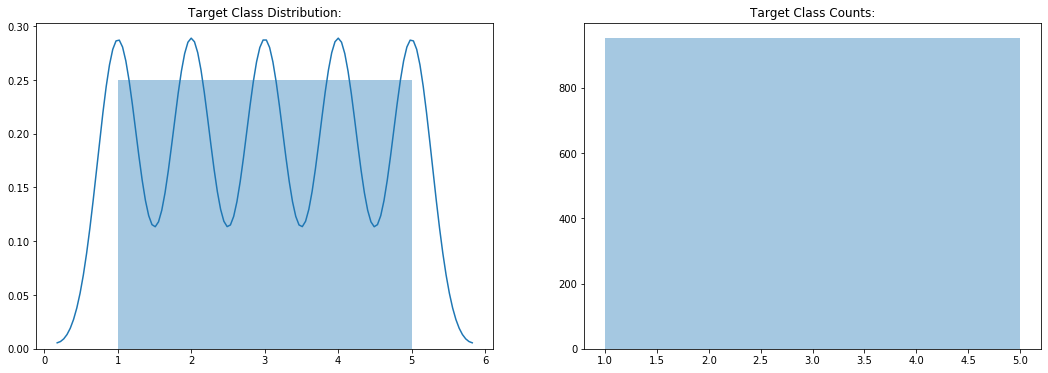

In [94]:
us = RandomUnderSampler()
X_us, y_us = us.fit_sample(X, y)

# Plot the new class distributions for y using the same funnction as above. 
plot_class_dist(y_us)

In [95]:

lr_clf = LogisticRegression(n_jobs=-1, random_state=959)

print('Original Dataset Scaled')
print('----------------------------------------------------------------')
stratified_cross_validate(lr_clf, X, y)
print('\nOversample all Classes to Majority Dataset')
print('----------------------------------------------------------------')
stratified_cross_validate(lr_clf, X_smote, y_smote)
print('\nMinority Undersampled Dataset')
print('----------------------------------------------------------------')
stratified_cross_validate(lr_clf, X_us, y_us)


Original Dataset Scaled
----------------------------------------------------------------
Fold Scores:
 
[1.         1.         1.         1.         1.         1.
 1.         0.99952908 1.         1.        ]
 
Mean Accuracy:  0.9999529079350129
Mean Fit Time:  11.607799863815307
Mean Score Time:  0.01133425235748291
CV Time:  18.852461338043213

Oversample all Classes to Majority Dataset
----------------------------------------------------------------
Fold Scores:
 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Mean Accuracy:  1.0
Mean Fit Time:  26.82322201728821
Mean Score Time:  0.02411673069000244
CV Time:  42.64561605453491

Minority Undersampled Dataset
----------------------------------------------------------------
Fold Scores:
 
[0.99789916 0.99789916 1.         1.         1.         1.
 1.         0.99789916 1.         1.        ]
 
Mean Accuracy:  0.9993697478991596
Mean Fit Time:  1.3890763759613036
Mean Score Time:  0.001601839065551758
CV Time:  2.2891790866851807


## Regression Analysis Helper Functions

In [96]:
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=959)

In [97]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)
mse_scorer = make_scorer(score_func = mean_squared_error, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer, 
                'MSE' : mse_scorer
               } 

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1
    scores['test_MSE'] = scores['test_MSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')
    
    #print mean MAE for all folds 
    MSEavg = scores['test_MSE'].mean()
    print_str = "The average MSE for all cv folds is: \t\t\t {MSEavg:.5}"
    print(print_str.format(MSEavg=MSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    scoresResults['MSE'] = scores['test_MSE']
    return scoresResults

class CappedLinearRegression(LinearRegression):

    def predict(self, X):
        return np.clip(super(CappedLinearRegression, self).predict(X), 1e5, 9.9e6) 


In [98]:
housing_data['LOGPRICE'] = np.log10(housing_data['SALEPRICE']) 

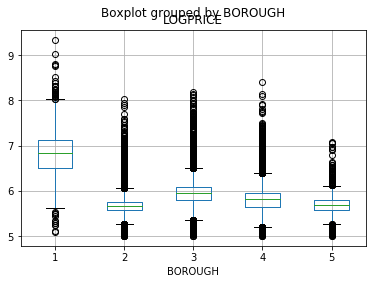

In [99]:
housing_data[housing_data.SALEPRICE > 1e5].boxplot(by = 'BOROUGH', column = 'LOGPRICE')

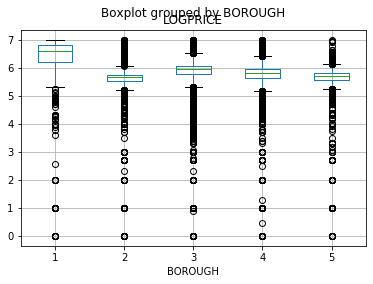

In [100]:
housing_data[housing_data.SALEPRICE < 1e7].boxplot(by = 'BOROUGH', column = 'LOGPRICE')

In [101]:
housing_data_regr = housing_data[(housing_data.SALEPRICECPY > 1e5) & (housing_data.SALEPRICECPY < 9.9e6)]

In [102]:
housing_data_regr = housing_data_regr.drop(columns = ['SALEPRICE'], axis = 1)

In [103]:
housing_data_regr = grouper_impute(dataframe_2 = housing_data_regr, grouper_col = 'ZIPCODE', grouper_impute = 'SALEPRICECPY', replace_val = 0, transfrmtn = 'median')

In [104]:
housing_data_regr.describe()

BOROUGH         BLOCK           LOT  RESIDENTIALUNITS  \
count  31457.000000  31457.000000  31457.000000      31457.000000   
mean       3.485933   5280.297803    227.741838          2.164415   
std        0.948677   3730.103038    482.988828         14.303541   
min        1.000000      1.000000      1.000000          0.000000   
25%        3.000000   2273.000000     22.000000          1.000000   
50%        3.000000   4690.000000     46.000000          1.000000   
75%        4.000000   7459.000000     96.000000          2.000000   
max        5.000000  16319.000000   5361.000000       1844.000000   

       COMMERCIALUNITS    TOTALUNITS  LANDSQUAREFEET  GROSSSQUAREFEET  \
count     31457.000000  31457.000000    3.145700e+04     3.145700e+04   
mean          0.198271      2.365038    3.513944e+03     3.020706e+03   
std          12.840738     19.284457    2.949562e+04     2.398142e+04   
min           0.000000      1.000000    2.000000e+02     1.200000e+02   
25%           0.000000      1.000000    2.000000e+03     1.418000e+03   
50%           0.000000      1.000000    2.488000e+03     2.000000e+03   
75%           0.000000      2.000000    3.491000e+03     2.868000e+03   
max        2261.000000   2261.000000    4.228300e+06     3.750565e+06   

          YEARBUILT  TAXCLASSATTIMEOFSALE  SALEPRICECPY      BUILDAGE  \
count  31457.000000          31457.000000  3.145700e+04  31457.000000   
mean    1945.989637              1.290269  9.412566e+05     70.660012   
std       34.864266              0.658754  1.056808e+06     34.868098   
min     1800.000000              1.000000  1.007000e+05      0.000000   
25%     1920.000000              1.000000  4.500000e+05     51.000000   
50%     1931.000000              1.000000  6.500000e+05     85.000000   
75%     1965.000000              1.000000  9.800000e+05     96.000000   
max     2017.000000              4.000000  9.890400e+06    217.000000   

           LOGPRICE  
count  31457.000000  
mean       5.841125  
std        0.309821  
min        5.003029  
25%        5.653213  
50%        5.812913  
75%        5.991226  
max        6.995214

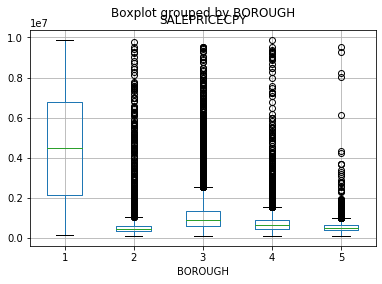

In [105]:
housing_data_regr.boxplot(by = 'BOROUGH', column = 'SALEPRICECPY')

In [106]:
housing_data_regr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31457 entries, 0 to 43046
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   BOROUGH                    31457 non-null  int64         
 1   NEIGHBORHOOD               31457 non-null  object        
 2   BUILDINGCLASSCATEGORY      31457 non-null  object        
 3   TAXCLASSATPRESENT          31457 non-null  object        
 4   BLOCK                      31457 non-null  int64         
 5   LOT                        31457 non-null  int64         
 6   BUILDINGCLASSATPRESENT     31457 non-null  object        
 7   ADDRESS                    31457 non-null  object        
 8   ZIPCODE                    31457 non-null  object        
 9   RESIDENTIALUNITS           31457 non-null  int64         
 10  COMMERCIALUNITS            31457 non-null  int64         
 11  TOTALUNITS                 31457 non-null  int64         
 12  LAND

In [107]:
feat_of_int = [ 'NEIGHBORHOOD', 'BUILDINGCLASSCATEGORY', 'ZIPCODE', 'DECADEBUILT','TAXCLASSATPRESENT', 'BUILDINGCLASSATPRESENT', 'TIMEOFMONTH','BUILDCLASSGENER']
housing_ml_df_regr = housing_data_regr[['NEIGHBORHOOD','BUILDINGCLASSCATEGORY','ZIPCODE', 'DECADEBUILT', 'TAXCLASSATPRESENT', 
                              'BUILDINGCLASSATPRESENT', 'TIMEOFMONTH','BUILDCLASSGENER', 
                              'RESIDENTIALUNITS', 'COMMERCIALUNITS', 'TOTALUNITS',
                              'LANDSQUAREFEET', 'GROSSSQUAREFEET','YEARBUILT',
                              'SALEPRICECPY','BUILDAGE','BOROUGH']]
ml_df_enc_regr = create_dummy_encod(ml_df = housing_ml_df_regr,features_of_interest = feat_of_int, drop_first_cat=True, sparsity=True)

In [108]:
y_regr = ml_df_enc_regr['SALEPRICECPY'].values
X_regr = ml_df_enc_regr.drop(columns = ['SALEPRICECPY'], axis = 1).values

In [109]:
print("min value of target : " ,min(y_regr)) 
print("max value of target : " ,max(y_regr)) 

min value of target :  100700
max value of target :  9890400


In [110]:
#Create a Linear Regression object and perform a grid search to find the best parameters
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

linreg = CappedLinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_regr,y_regr)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.9min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=959, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=CappedLinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [111]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

regGridSearch.best_estimator_

CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                       normalize=False)

In [112]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X_regr,y_regr, cv)

The average MAE for all cv folds is: 			 3.1811e+05
The average MAE percentage (MAPE) for all cv folds is: 	 42.818
The average RMSE for all cv folds is: 			 6.7256e+05
*********************************************************
The average MSE for all cv folds is: 			 4.5282e+11
*********************************************************
Cross Validation Fold Mean Error Scores


MAE       MAPE           RMSE           MSE
0  314709.174725  43.009640  654610.536615  4.285150e+11
1  320429.472810  42.642314  678680.825807  4.606077e+11
2  310647.480999  42.156446  636308.460933  4.048885e+11
3  325065.099475  44.934262  710730.204434  5.051374e+11
4  319254.359430  41.590041  659739.223306  4.352558e+11
5  315220.600339  42.964628  648958.867278  4.211476e+11
6  317025.273181  42.803185  680436.309747  4.629936e+11
7  314824.466469  40.990626  668770.446823  4.472539e+11
8  322644.527464  41.997770  693901.616816  4.814995e+11
9  321251.132539  45.094460  693503.829207  4.809476e+11

Running 10 CV with SVR will take more than 308s on this machine, I wil use 10 CV SDG using the RBF kernel from Nystroem for grid searching 

In [113]:
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=959)

In [114]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html#sklearn.kernel_approximation.Nystroem

reg = SGDRegressor()

feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                                n_components=400)

X_regr_transformed = feature_map_nystroem.fit_transform(X_regr)

#Set up SDG with RBF Kernel SVR parameters to test (WARNING: Creates 40 models!!!) 
loss = ['squared_loss', 'epsilon_insensitive']
alphas = [0.0001, 0.1]
penalty = ['l2']
parameters = {'loss': loss, 'alpha' : alphas, 'penalty': penalty }

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_regr_transformed,y_regr)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:  4.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=959, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.0001, 0.1],
                         'loss': ['squared_loss', 'epsilon_insensitive'],
                         'penalt

In [115]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

regGridSearch.best_estimator_

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [116]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X_regr_transformed ,y_regr, cv)

The average MAE for all cv folds is: 			 5.608e+05
The average MAE percentage (MAPE) for all cv folds is: 	 84.532
The average RMSE for all cv folds is: 			 1.0375e+06
*********************************************************
The average MSE for all cv folds is: 			 1.0771e+12
*********************************************************
Cross Validation Fold Mean Error Scores


MAE       MAPE          RMSE           MSE
0  561688.061714  85.375574  1.026916e+06  1.054557e+12
1  572400.464399  85.321419  1.068319e+06  1.141305e+12
2  556029.160270  85.952245  9.986495e+05  9.973008e+11
3  565418.430866  85.942544  1.036202e+06  1.073714e+12
4  582702.070670  86.019991  1.090979e+06  1.190236e+12
5  554467.916341  85.805863  1.020286e+06  1.040984e+12
6  543728.797355  83.543133  1.004216e+06  1.008449e+12
7  566119.955639  83.300696  1.058640e+06  1.120718e+12
8  547794.904700  78.811765  1.037446e+06  1.076294e+12
9  557698.486547  85.250785  1.033263e+06  1.067632e+12

In [117]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_regr,y_regr)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  5.1min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  5.4min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=959, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=True, positive=False,
                             precompute=True, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [118]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

regGridSearch.best_estimator_

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000, normalize=True,
      positive=False, precompute=True, random_state=0, selection='random',
      tol=0.0001, warm_start=True)

In [119]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

#Create a regression estimator with best parameters for cross validation
regEstimator = Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000, normalize=True,
      positive=False, precompute=True, random_state=0, selection='random',
      tol=0.0001, warm_start=True)
#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_regr,y_regr, cv)

The average MAE for all cv folds is: 			 3.2102e+05
The average MAE percentage (MAPE) for all cv folds is: 	 44.177
The average RMSE for all cv folds is: 			 7.1903e+05
*********************************************************
The average MSE for all cv folds is: 			 5.2296e+11
*********************************************************
Cross Validation Fold Mean Error Scores


MAE       MAPE           RMSE           MSE
0  314820.151966  43.912891  650546.328745  4.232105e+11
1  322246.903140  43.476013  686952.386123  4.719036e+11
2  312121.066862  43.433088  638047.643747  4.071048e+11
3  333488.809638  48.394923  877647.966119  7.702660e+11
4  321186.964052  42.524210  665329.666839  4.426636e+11
5  317568.466707  44.168999  679021.725569  4.610705e+11
6  317720.675372  43.610592  712631.898891  5.078442e+11
7  318215.367068  41.756074  699552.649572  4.893739e+11
8  328816.050897  44.106451  849790.894674  7.221446e+11
9  324012.395129  46.390466  730790.878708  5.340553e+11

In [120]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb
#What is the maximum price pridcted?

regEstimator = Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000, normalize=True,
      positive=False, precompute=True, random_state=0, selection='random',
      tol=0.0001, warm_start=True)

regEstimator.fit(X_regr,y_regr)
yhat = regEstimator.predict(X_regr)
print('Target Max: ', y_regr.max())
print("Yhat Max: ", yhat.max())

Target Max:  9890400
Yhat Max:  9867079.347129833


In [121]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

reg = Ridge(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 5, 10, 20]
solver = [ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
parameters = {'alpha': alpha, 'solver': solver}

#Create a grid search object using the parameters above
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_regr,y_regr)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   59.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 20.4min
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed: 24.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=959, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, random_state=0,
                             solver='auto', tol=0.0001),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 5, 10, 20],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [122]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

regGridSearch.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      random_state=0, solver='lsqr', tol=0.0001)

In [123]:
#Create a regression estimator with best parameters for cross validation
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_regr,y_regr, cv)

The average MAE for all cv folds is: 			 3.2287e+05
The average MAE percentage (MAPE) for all cv folds is: 	 44.507
The average RMSE for all cv folds is: 			 7.6629e+05
*********************************************************
The average MSE for all cv folds is: 			 6.1176e+11
*********************************************************
Cross Validation Fold Mean Error Scores


MAE       MAPE          RMSE           MSE
0  316106.228848  43.854278  6.547929e+05  4.287537e+11
1  323952.768372  43.379545  6.871984e+05  4.722417e+11
2  313788.206029  43.385906  6.462588e+05  4.176505e+11
3  338910.446901  49.774942  1.140030e+06  1.299668e+12
4  321675.314284  42.369559  6.627864e+05  4.392858e+11
5  318379.180048  44.273314  6.869537e+05  4.719053e+11
6  320231.631545  44.596038  7.668333e+05  5.880333e+11
7  319388.457317  41.895539  6.992514e+05  4.889525e+11
8  332689.517758  45.290776  9.896369e+05  9.793813e+11
9  323627.046204  46.252112  7.292001e+05  5.317328e+11

In [124]:
#Fit to data for scaling
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb


ML_std_scalr.fit(X_regr)

#Transform training data to z-scores
#This makes our model's coefficients take on the same scale for accurate feature importance analisys 
X_regr_scl = ML_std_scalr.transform(X_regr)

In [125]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb


linreg = GradientBoostingRegressor()

parameters = { 'loss' : ['ls']
              ,'learning_rate' : [1e-3, 1e-1]
              ,'n_estimators': [500] 
              ,'criterion': ['mae']
              ,'min_samples_split':[2,3,4,5]
              ,'min_samples_leaf': [10, 25, 50]
              ,'max_features' : ['auto']
              ,'subsample' : [1e-2]
#              ,'n_jobs':[8] 
              ,'random_state': [0]
             }



              

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_regr_scl , y_regr)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   57.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed:  4.4min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=959, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min...
             param_grid={'criterion': ['mae'], 'learning_rate': [0.001, 0.1],
                         'loss': ['ls'], 'max_features': ['auto'],
                 

In [126]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb
#Display the best estimator parameters
regGridSearch.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=0.01, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [127]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_regr_scl , y_regr, cv)

The average MAE for all cv folds is: 			 3.6935e+05
The average MAE percentage (MAPE) for all cv folds is: 	 48.801
The average RMSE for all cv folds is: 			 7.3913e+05
*********************************************************
The average MSE for all cv folds is: 			 5.4657e+11
*********************************************************
Cross Validation Fold Mean Error Scores


MAE       MAPE           RMSE           MSE
0  369403.052045  48.408507  728712.985069  5.310226e+11
1  375847.961285  48.917198  763174.855880  5.824359e+11
2  366254.118745  49.390088  709541.847854  5.034496e+11
3  381278.449569  51.336098  751252.182310  5.643798e+11
4  378056.674072  48.720271  753203.498253  5.673155e+11
5  359852.827816  48.696149  717716.711063  5.151173e+11
6  367801.396535  48.585890  744514.285944  5.543015e+11
7  367289.205355  46.930605  747378.853269  5.585752e+11
8  365624.922561  46.515848  740490.246448  5.483258e+11
9  362041.674503  50.506461  735349.204195  5.407385e+11

In [128]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

#Create a regression estimator with best parameters for cross validation
regEstimator = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=0.01, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#Fit the model using all of the scaled training data
regEstimator.fit(X_regr_scl , y_regr) 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=0.01, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
ml_df_feats = ml_df_enc_regr.drop(columns = ['SALEPRICECPY'], axis = 1)

In [130]:
ml_df_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31457 entries, 0 to 43046
Columns: 632 entries, RESIDENTIALUNITS to BUILDCLASSGENER_ZONED
dtypes: Sparse[uint8, 0](624), int64(8)
memory usage: 3.1 MB


In [131]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

weights = regEstimator.feature_importances_.ravel()
feature_names = ml_df_feats.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

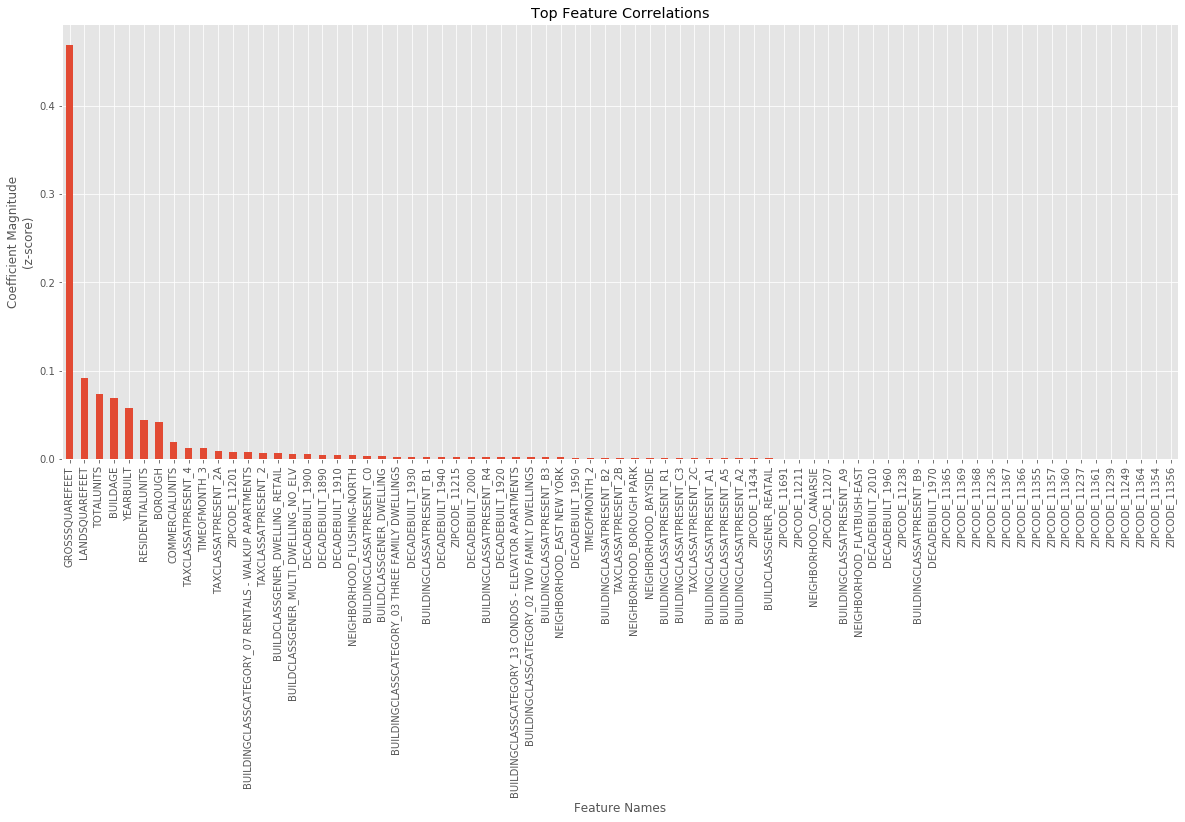

In [132]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

Cumulative Explained variance explained with : 375 components: 0.9112841360493044


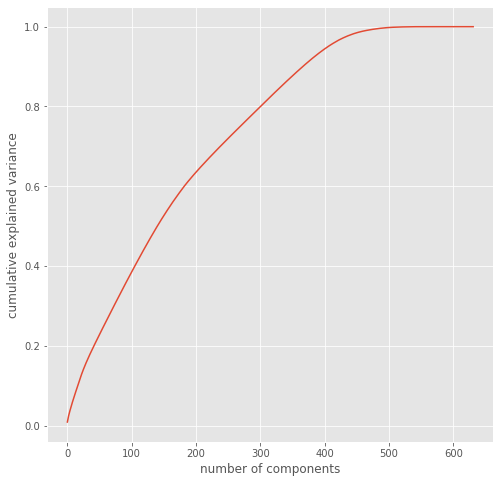

In [133]:
# Plot the PCA spectrum

#ML_std_scalr.fit(X_regr,y_regr)

X_regr_pca = ML_std_scalr.fit_transform(X_regr)

plot_pca(X_regr_pca ,var_ratio_pcs = 375)

In [134]:

linreg = GradientBoostingRegressor()

parameters = { 'loss' : ['ls']
              ,'learning_rate' : [1e-3, 1e-1]
              ,'n_estimators': [500] 
              ,'criterion': ['mae']
              ,'min_samples_split':[2,3,4,5]
              ,'min_samples_leaf': [10, 25, 50]
              ,'max_features' : ['auto']
              ,'subsample' : [1e-2]
#              ,'n_jobs':[8] 
              ,'random_state': [0]
             }

pca = PCA(n_components=400)

pipe = Pipeline([('scaler',ML_std_scalr), ('pca', pca)]) 

pipe.fit(X_regr, y_regr)

X_regr_scl_p = pipe.transform(X_regr)

              

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_regr_scl_p , y_regr)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 19.5min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 77.1min
[Parallel(n_jobs=8)]: Done 240 out of 240 | elapsed: 91.6min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=959, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min...
             param_grid={'criterion': ['mae'], 'learning_rate': [0.001, 0.1],
                         'loss': ['ls'], 'max_features': ['auto'],
                 

In [135]:
regGridSearch.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=25, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=0.01, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [136]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

 
regEstimator = regGridSearch.best_estimator_

pca = PCA(n_components=400)

pipe = Pipeline([('scaler',ML_std_scalr), ('pca', pca)]) 

pipe.fit(X_regr, y_regr)

X_regr_scl_p = pipe.transform(X_regr)


In [137]:
EvaluateRegressionEstimator(regEstimator, X_regr_scl_p,y_regr, cv)

The average MAE for all cv folds is: 			 3.8749e+05
The average MAE percentage (MAPE) for all cv folds is: 	 49.404
The average RMSE for all cv folds is: 			 8.0691e+05
*********************************************************
The average MSE for all cv folds is: 			 6.516e+11
*********************************************************
Cross Validation Fold Mean Error Scores


MAE       MAPE           RMSE           MSE
0  387249.992697  50.870036  779350.373394  6.073870e+11
1  389292.270777  49.060970  843603.739954  7.116673e+11
2  383425.563929  49.478845  789098.648597  6.226767e+11
3  389387.113112  49.900947  793053.685014  6.289341e+11
4  398371.027091  48.812423  848290.500794  7.195968e+11
5  384821.307841  50.595557  790890.464345  6.255077e+11
6  382609.432225  49.400524  802069.829202  6.433160e+11
7  389360.217434  47.710018  824362.171061  6.795730e+11
8  384200.112638  48.092448  800929.771302  6.414885e+11
9  386204.829890  50.114998  797416.467381  6.358730e+11

In [138]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

pca = PCA(n_components=400) 

pipe = Pipeline([('scaler',ML_std_scalr), ('pca', pca)]) 

pipe.fit(X_regr, y_regr)

X_regr_scl_p = pipe.transform(X_regr)


#Create a grid search object using the parameters above

regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_regr_scl_p,y_regr)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   19.8s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  1.1min finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=959, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000, normalize=True, positive=False,
                             precompute=True, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [139]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

regGridSearch.best_estimator_

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=10000, normalize=True,
      positive=False, precompute=True, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=True)

In [140]:
#Adopted from https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb

#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_
#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_regr_scl_p,y_regr, cv)

The average MAE for all cv folds is: 			 3.5876e+05
The average MAE percentage (MAPE) for all cv folds is: 	 49.711
The average RMSE for all cv folds is: 			 7.5554e+05
*********************************************************
The average MSE for all cv folds is: 			 5.7219e+11
*********************************************************
Cross Validation Fold Mean Error Scores


MAE       MAPE           RMSE           MSE
0  356393.295601  49.646932  726648.808141  5.280185e+11
1  363391.142400  49.247864  753354.595825  5.675431e+11
2  355712.324713  49.380140  715355.106107  5.117329e+11
3  363195.940699  51.729101  773220.538802  5.978700e+11
4  359635.794984  48.286611  720428.896303  5.190178e+11
5  354030.638984  50.193150  744416.486801  5.541559e+11
6  353253.140084  49.948279  787894.084493  6.207771e+11
7  355871.329500  47.676931  721315.193627  5.202956e+11
8  365755.553958  48.978801  837551.058190  7.014918e+11
9  360376.090428  52.021682  775210.677252  6.009516e+11

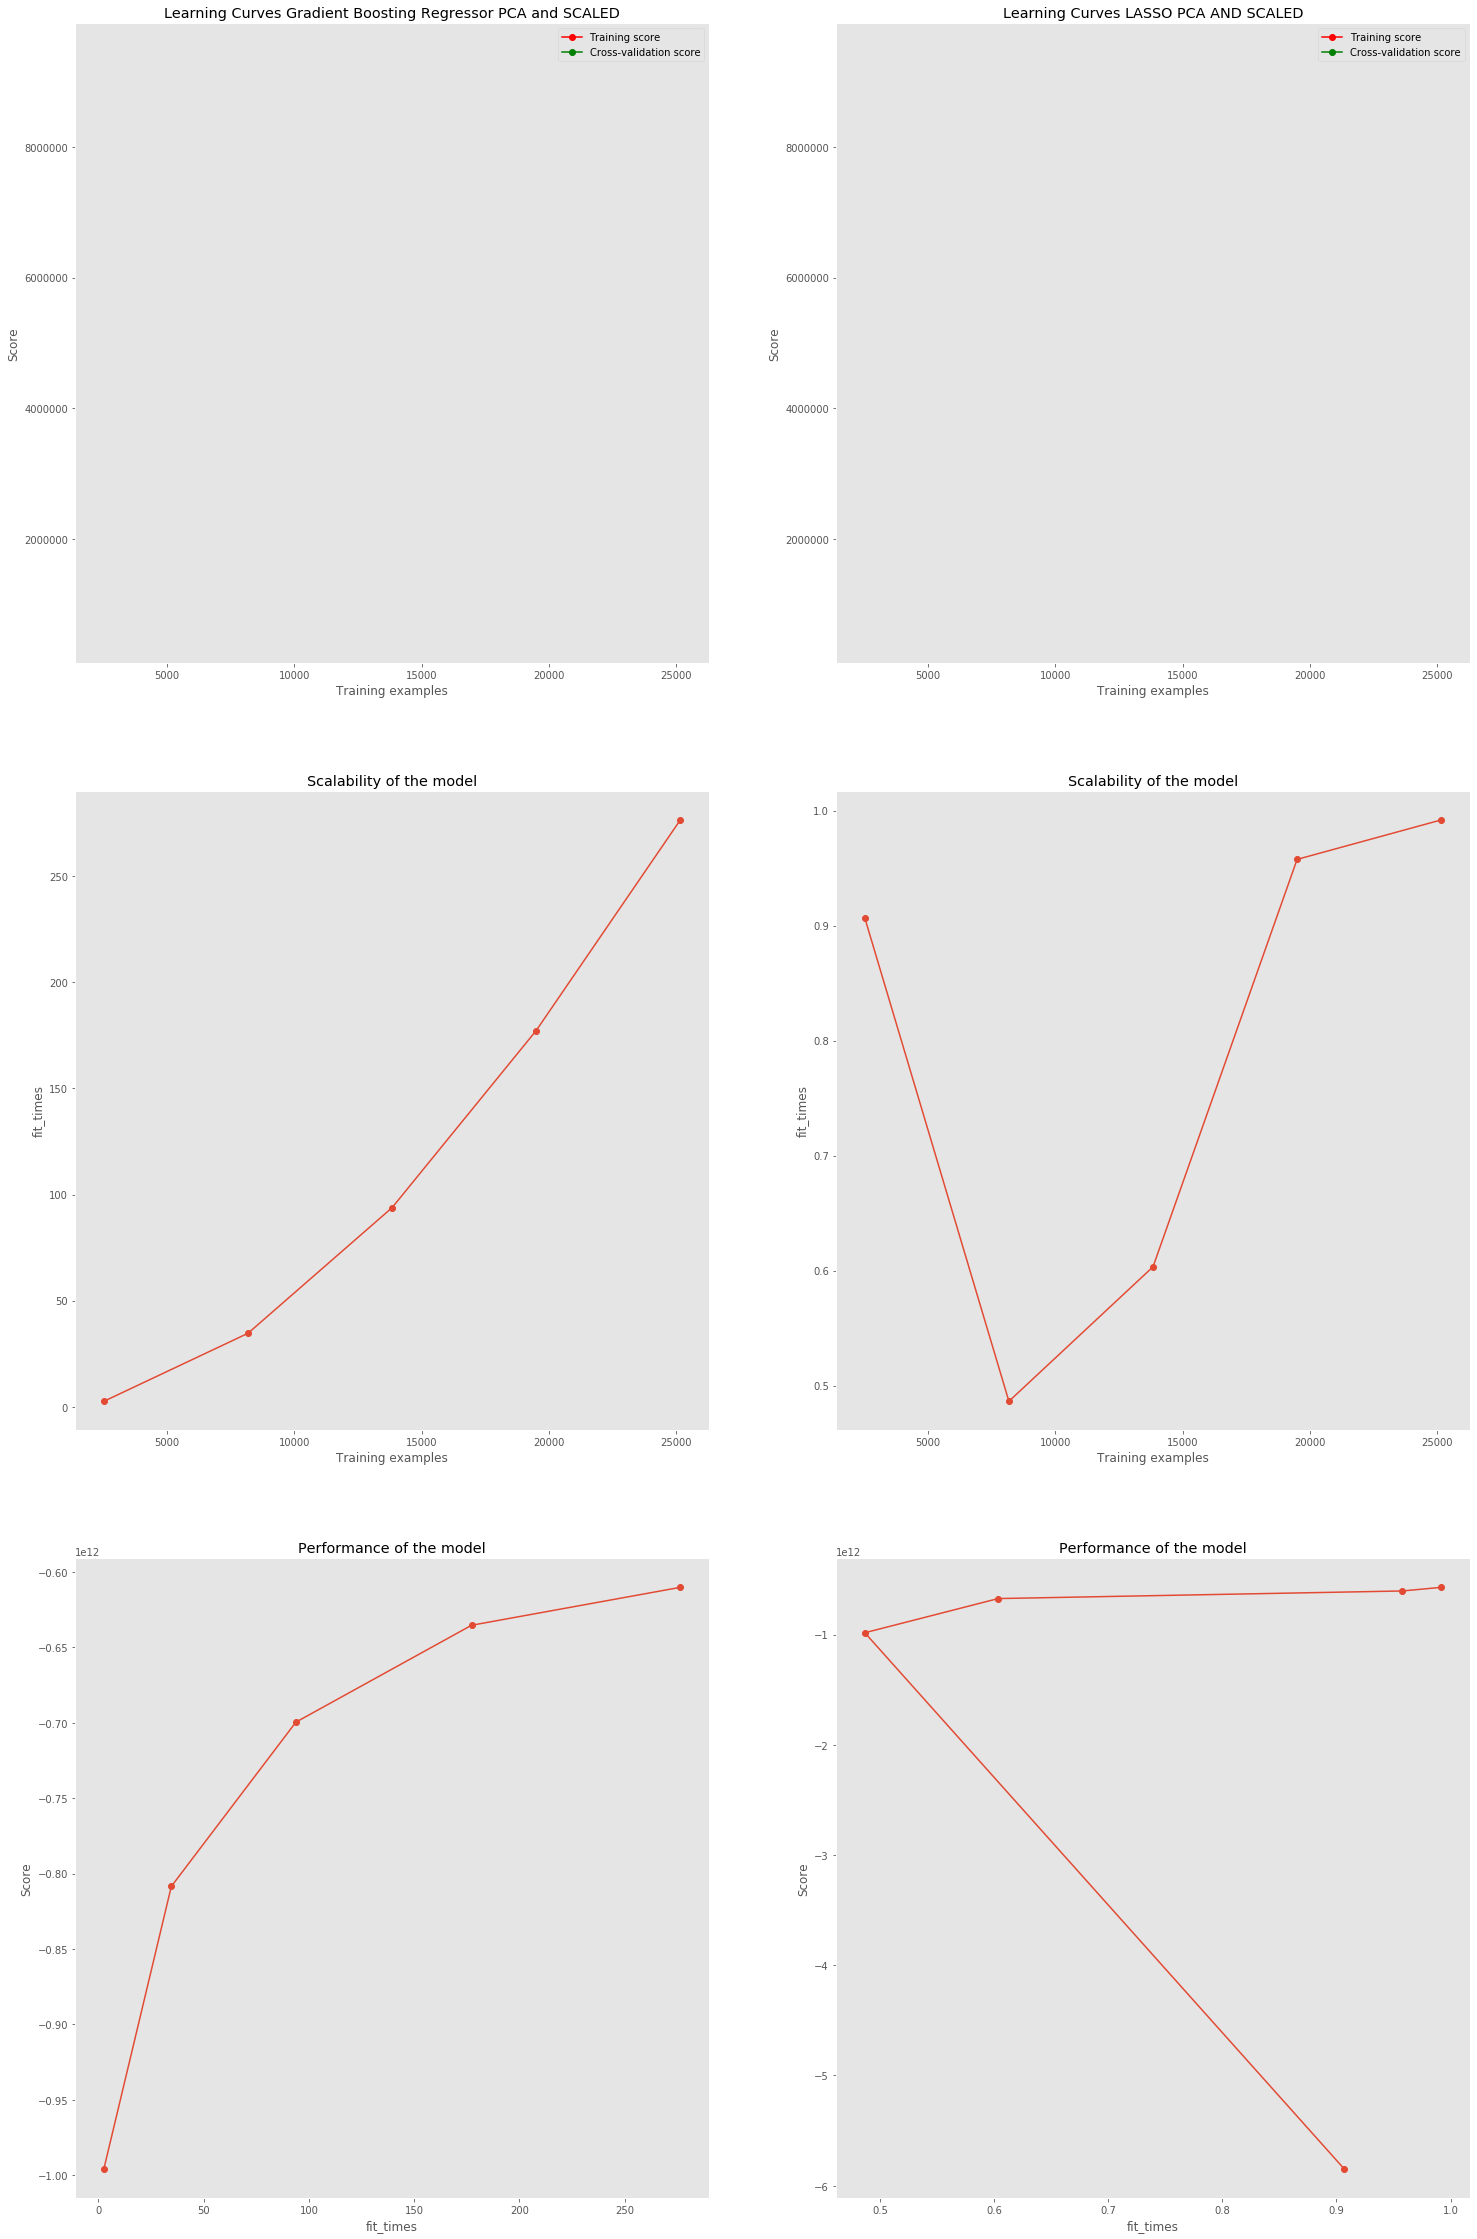

In [141]:
fig, axes = plt.subplots(3, 2, figsize=(25, 40))

title = r"Learning Curves Gradient Boosting Regressor PCA and SCALED" 
# SVC is more expensive so we do a lower number of CV iterations:

estimator = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=0.01, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

plot_learning_curve(estimator, title, X_regr_scl_p,y_regr, axes=axes[:, 0], ylim=(y_regr.min(), y_regr.max()),
                    cv=cv, n_jobs=-1, scoring = 'neg_mean_squared_error')


title = r"Learning Curves LASSO PCA AND SCALED"


estimator = Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=10000, normalize=True,
      positive=False, precompute=True, random_state=0, selection='random',
      tol=0.0001, warm_start=True)

plot_learning_curve(estimator, title, X_regr_scl_p,y_regr, axes=axes[:, 1], ylim=(y_regr.min(), y_regr.max()),
                    cv=cv, n_jobs=-1, scoring = 'neg_mean_squared_error')

plt.show()

In [142]:
#Adapted from 
#https://github.com/jakemdrew/DataMiningNotebooks/blob/master/06.%20Classification.ipynb

regr1 = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=25, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=0.01, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)



regr2 = Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000, normalize=True,
      positive=False, precompute=True, random_state=0, selection='random',
      tol=0.0001, warm_start=True)


pca = PCA(n_components=400) 


regest1 = Pipeline(
    [('scaler',ML_std_scalr),
     ('pca',pca),
     ('regr',regr1)]
)

regest2 = Pipeline(
    [('scaler',ML_std_scalr),
     ('pca',pca),
     ('regr',regr2)]
)




cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=959)
reg_err1 = cross_val_score(regest1, X_regr, y_regr, cv=cv, scoring = 'neg_mean_absolute_error')
reg_err2 = cross_val_score(regest2, X_regr, y_regr, cv=cv, scoring = 'neg_mean_absolute_error')

In [143]:
regr3 = CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                       normalize=False)

regest3 = Pipeline(
    [('scaler',ML_std_scalr),
     ('pca',pca),
     ('regr',regr3)]
)

cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=959)

reg_err3 = cross_val_score(regest3, X_regr, y_regr, cv=cv, scoring = 'neg_mean_absolute_error')

In [144]:
regr4 = CappedLinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                       normalize=False)

regest4 = Pipeline(
    [('scaler',ML_std_scalr),
     ('regr',regr4)]
)

cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=959)

reg_err4 = cross_val_score(regest4, X_regr, y_regr, cv=cv, scoring = 'neg_mean_absolute_error')

In [145]:
regr5 = Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000, normalize=True,
      positive=False, precompute=True, random_state=0, selection='random',
      tol=0.0001, warm_start=True)

regest5 = Pipeline(
    [('scaler',ML_std_scalr),
     ('regr',regr5)]
)

cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=959)

reg_err5 = cross_val_score(regest5, X_regr, y_regr, cv=cv, scoring = 'neg_mean_absolute_error')

In [146]:
# wanting to check 4 models, so bonferroni correction for alpha = 0.05 / 4 = 0.0125 therefore t = 3.169 
# we reject h0 the models are statistically different, as zero is not in the interval, The LASSO model is the better 
#regressor model. 


t = 3.169 / np.sqrt(10)

e = abs(reg_err1) - abs(reg_err2) 

stdtot = np.std(e)

dbar = np.mean(e)
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (abs(np.mean(reg_err1)), abs(np.mean(reg_err2)))

Range of: 23530.28682003964 43805.595959265665
392379.06024791935 358711.11885826674


In [147]:
# fail to reject h0, the models are not statistically different, 
#there is not sufficient evidence to suggest the error from the capped linear regression and the lasso regression 
# is different. 
t = 3.169 / np.sqrt(10)

e =  abs(reg_err2) - abs(reg_err3)

stdtot = np.std(e)

dbar = np.mean(e)
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (abs(np.mean(reg_err2)), abs(np.mean(reg_err3)))

Range of: -1328.8218499845852 5759.278651948812
358711.11885826674 356495.8904572845


In [148]:
#  reject h0 the models are statistically different, as zero is not in the interval, The LASSO model with more features 
#predicts lower MSE. 
t = 3.169 / np.sqrt(10)

e =  abs(reg_err2) - abs(reg_err4)

stdtot = np.std(e)

dbar = np.mean(e)
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (abs(np.mean(reg_err2)), abs(np.mean(reg_err4)))

Range of: 25749.91810269564 38660.02602505659
358711.11885826674 326506.1467943906


In [149]:
#  reject h0 the models are statistically different, as zero is not in the interval, The LASSO model with more features 
#predicts lower MSE. 
t = 3.169 / np.sqrt(10)

e =  abs(reg_err2) - abs(reg_err5)

stdtot = np.std(e)

dbar = np.mean(e)
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (abs(np.mean(reg_err2)), abs(np.mean(reg_err5)))

Range of: 34997.97715334494 40384.890396898554
358711.11885826674 321019.6850831449


In [150]:
#https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
#https://nbviewer.jupyter.org/github/jakemdrew/EducationDataNC/blob/master/2017/Models/2017SegregatedElementarySchoolCampuses.ipynb
#Create a regression estimator with best parameters for cross validation
regrlasso = Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000, normalize=True,
      positive=False, precompute=True, random_state=0, selection='random',
      tol=0.0001, warm_start=True)
 

pipe = Pipeline([('scaler',ML_std_scalr)]) 

pipe.fit(X_regr, y_regr)

X_regr_scl_p = pipe.transform(X_regr)

rfecv = RFECV(estimator=regrlasso, step=1, cv=cv, scoring='neg_mean_absolute_error')
rfecv.fit(X_regr_scl_p, y_regr)

RFECV(cv=ShuffleSplit(n_splits=10, random_state=959, test_size=0.2, train_size=None),
      estimator=Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000,
                      normalize=True, positive=False, precompute=True,
                      random_state=0, selection='random', tol=0.0001,
                      warm_start=True),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_absolute_error',
      step=1, verbose=0)

Optimal number of features : 632


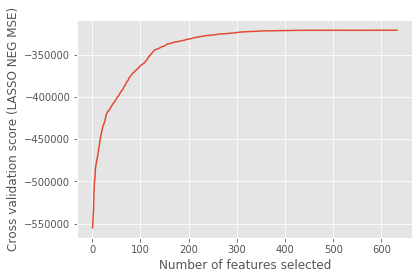

In [151]:
%matplotlib inline

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (LASSO NEG MSE)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [152]:
plt.style.use('ggplot')

rfe_ft_imp_df = pd.DataFrame({'feature_names':ml_df_feats.columns, 'weights':rfecv.grid_scores_})
rfe_ft_imp_df.sort_values(by='weights', inplace=True, ascending=False )

top50features = rfe_ft_imp_df.head(50)

top50features

feature_names        weights
631               BUILDCLASSGENER_ZONED -321019.685083
547           BUILDINGCLASSATPRESENT_K1 -321020.002425
565           BUILDINGCLASSATPRESENT_N9 -321023.064459
454                       ZIPCODE_11434 -321023.858685
607           BUILDINGCLASSATPRESENT_W9 -321024.044340
462                    DECADEBUILT_1840 -321024.355173
523           BUILDINGCLASSATPRESENT_F9 -321025.865451
620  BUILDCLASSGENER_MULTI_DWELLING_ELV -321027.682028
460                       ZIPCODE_11694 -321028.729798
468                    DECADEBUILT_1910 -321029.215167
601           BUILDINGCLASSATPRESENT_V1 -321029.222656
464                    DECADEBUILT_1870 -321029.835140
514           BUILDINGCLASSATPRESENT_D7 -321030.751302
557           BUILDINGCLASSATPRESENT_L3 -321032.181334
447                       ZIPCODE_11423 -321032.318328
504           BUILDINGCLASSATPRESENT_C5 -321032.982624
457                       ZIPCODE_11691 -321034.355227
513           BUILDINGCLASSATPRESENT_D6 -321034.624634
458                       ZIPCODE_11692 -321035.630947
456                       ZIPCODE_11436 -321036.425903
446                       ZIPCODE_11422 -321036.435418
498           BUILDINGCLASSATPRESENT_B9 -321037.229653
505           BUILDINGCLASSATPRESENT_C6 -321037.664110
452                       ZIPCODE_11432 -321038.184809
470                    DECADEBUILT_1930 -321038.684857
567           BUILDINGCLASSATPRESENT_O2 -321038.991975
493           BUILDINGCLASSATPRESENT_A7 -321039.158538
603           BUILDINGCLASSATPRESENT_W2 -321039.301075
520           BUILDINGCLASSATPRESENT_F2 -321039.942244
519           BUILDINGCLASSATPRESENT_F1 -321040.169823
466                    DECADEBUILT_1890 -321040.380610
481                TAXCLASSATPRESENT_1C -321040.512149
467                    DECADEBUILT_1900 -321041.103219
533           BUILDINGCLASSATPRESENT_GW -321041.111498
598           BUILDINGCLASSATPRESENT_S5 -321041.349010
502           BUILDINGCLASSATPRESENT_C3 -321042.139362
494           BUILDINGCLASSATPRESENT_A9 -321042.930748
583           BUILDINGCLASSATPRESENT_R6 -321043.628610
445                       ZIPCODE_11421 -321044.153719
507           BUILDINGCLASSATPRESENT_C9 -321044.740760
511           BUILDINGCLASSATPRESENT_D4 -321044.913600
450                       ZIPCODE_11428 -321045.318439
463                    DECADEBUILT_1850 -321045.382943
616        BUILDCLASSGENER_GARAGE_P_LOT -321045.522718
595           BUILDINGCLASSATPRESENT_S2 -321045.545934
592           BUILDINGCLASSATPRESENT_RT -321045.738564
506           BUILDINGCLASSATPRESENT_C7 -321046.328010
586           BUILDINGCLASSATPRESENT_RB -321046.681487
461                    DECADEBUILT_1830 -321046.880526
572           BUILDINGCLASSATPRESENT_O9 -321047.410506